# Анализ эффективности маркетинговых кампаний и сегментация клиентов

**Цели проекта:**
- Оценки эффективности проведённой маркетинговой кампании
- Выявления факторов, способных повысить продажи
- Сегментации клиентской базы для персонализации маркетинговых стратегий
- Построения модели прогнозирования склонности к покупке обуви

## Описание данных

**Основная база данных (`shop_database.db`):**
- `personal_data` - социально-демографические характеристики клиентов (ID, пол, возраст, образование, страна, город)
- `personal_data_coeffs` - персональные коэффициенты клиентов (включая `personal_coef`)
- `purchases` - детальная информация о покупках (товар, цвет, стоимость, скидки, дата)

**Дополнительные файлы:**
- `personal_data.csv.gz` - восстановленные данные (отсутствует информация о поле)
- `ids_first_company_positive.txt` - ID клиентов участвовавших в маркетинговой кампании
- `ids_first_company_negative.txt` - ID клиентов контрольной группы

## Контекст и ограничения данных

### Особенности данных
- **Географические данные**: страна и город соответствуют месту рождения, а не текущему местопребыванию
- **Фокус анализа**: работа с клиентами страны 32
- **Восстановленные данные**: часть информации была утеряна и восстановлена из CSV-файла

### Маркетинговая кампания
- **Период**: с 5-го по 16-й день
- **Механика**: персональные скидки 5,000 клиентам через email-рассылку
- **Группа контроля**: клиенты со схожими характеристиками, не получившие скидку

## Методология анализа
### Блок 1: Загрузка и первичная обработка данных

- Загрузка данных
- Интеграция восстановленных данных
- Объединение данных
- Преобразование текстовых признаков
- Создание бизнес-ориентированных категорий товаров на основе групп товаров
- Заполнение пропусков

### Блок 2: A/B тестирование маркетинговой кампании
- Сравнение метрик между тестовой и контрольной группами
- Статистическая проверка значимости результатов
- Формулировка бизнес-рекомендаций по эффективности кампании

### Блок 3: Кластерный анализ клиентов
- Сегментация клиентской базы на основе поведенческих и демографических характеристик
- Использование случайной выборки 100,000 строк для оптимизации вычислений
- Разработка персонализированных стратегий для каждого кластера

### Блок 4: Прогнозное моделирование
- Построение модели склонности к покупке обуви
- Фокус на целевую аудиторию: жители страны 32, города 1,188
- Подготовка к запуску новой маркетинговой кампании

## Оглавление

- [**Блок 1: Загрузка и первичная обработка данных**](#Блок-1-Загрузка-и-первичная-обработка-данных)<br><br>
    - [Загрузка данных из SQLite-базы](#Загрузка-данных-из-SQLite-базы)
    - [Загрузка данных в pandas DataFrame](#Загрузка-данных-в-pandas-DataFrame)
    - [Загрузка cvs файла (восстановленных данных с отсутствием информации о поле)](#Загрузка-cvs-файла-(восстановленных-данных-с-отсутствием-информации-о-поле))
    - [Загрузка идентификаторов клиентов, участвовавших в A/B тестировании маркетинговой кампании.](#Загружаем-идентификаторы-клиентов,-участвовавших-в-A/B-тестировании-маркетинговой-кампании.)
    - [Интеграция восстановленных данных и объединение](#Интеграция-восстановленных-данных-и-объединение)
    - [Преобразование текстовых признаков](#Преобразование-текстовых-признаков)
        - [Извлечение базовых категорий товаров и применение к данным](#Извлечение-базовых-категорий-товаров-и-применение-к-данным)
        - [Преобразование признака **colour**](#Преобразование-признака-colour) 
    - [Восстановление пропущенных значений в **colour модой**](#Восстановление-пропущенных-значений-в-colour-модой)
    - [Восстановление пропусков в **product_sex**](#Восстановление-пропусков-в-product_sex)
        - [Первичное заполнение в **product_sex** на основе анализа текста в **product**](#Первичное-заполнение-в-product_sex-на-основе-анализа-текста-в-product)
        - [Заполнение в **product_sex** на основе цвета](#Заполнение-в-product_sex-на-основе-цвета)
        - [Статистический анализ связи полов](#Статистический-анализ-связи-полов)
        - [Построение модели машинного обучения для заполнения оставшихся пропусков в **product_sex**](#Построение-модели-машинного-обучения-для-заполнения-оставшихся-пропусков-в-product_sex)
    - [Подбор числа кластеров: метод локтя и силуэт](#Подбор-числа-кластеров-метод-локтя-и-силуэт)
    - [Построение модели **KPrototypes**](#Построение-модели-KPrototypes)
    - [Визуализация и анализ кластеров](#Визуализация-и-анализ-кластеров)
    - [Бизнес-интерпретация и рекомендации](#Бизнес-интерпретация-и-рекомендации)<br><br>
    
- [**Блок 2: AB тестирование маркетинговой кампании**](#Блок-2-AB-тестирование-маркетинговой-кампании)<br><br>

    - [Подготовка данных](#Подготовка-данных)
    - [1. Конверсия в покупку](#1-Конверсия-в-покупку)
    - [2. Совокупная выручка и количество заказов](#2-Совокупная-выручка-и-количество-заказов)
    - [3. Средняя выручка на клиента в группе](#3-Средняя-выручка-на-клиента-в-группе)
    - [4. Средняя выручка на совершившего покупку клиента](#4-Средняя-выручка-на-совершившего-покупку-клиента)
       - [Сегментированная выручка по категориям товаров, возрасту и полу](#Сегментированная-выручка-по-категориям-товаров,-возрасту-и-полу)
    - [6. Средний чек покупки](#6-Средний-чек-покупки)
    - [7. Среднее количество заказов на клиента в группе](#7-Среднее-количество-заказов-на-клиента-в-группе)
    - [8. Среднее количество заказов на клиента, совершившего покупку](#8-Среднее-количество-заказов-на-клиента,-совершившего-покупку)
       - [Частота покупок (сегментация по товарным категориям, полу и возрасту)](#Частота-покупок-(сегментация-по-товарным-категориям,-полу-и-возрасту))
    - [10. Выручка в разрезе дней](#10-Выручка-в-разрезе-дней)
    - [11. Количество покупок в день](#11-Количество-покупок-в-день)
    - [13. Доля клиентов с повторными покупками](#13-Доля-клиентов-с-повторными-покупками)  
    - [Вывод и рекомендации](#Вывод-и-рекомендации)<br><br>
    
- [**Блок 3: Кластерный анализ методом KPrototypes**](#Блок-3-Кластерный-анализ-методом-KPrototypes)<br><br>

    - [Описание данных для кластеризации](#Описание-данных-для-кластеризации)
    - [Предобработка и генерация признаков](#Предобработка-и-генерация-признаков)
    - [Масштабирование и подготовка к кластеризации](#Масштабирование-и-подготовка-к-кластеризации)
    - [Подбор числа кластеров: метод локтя и силуэт](#Подбор-числа-кластеров-метод-локтя-и-силуэт)
    - [Построение модели KPrototypes](#Построение-модели-KPrototypes)
    - [Визуализация и анализ кластеров](#Визуализация-и-анализ-кластеров)
    - [Анализ характеристик кластеров](#Анализ-характеристик-кластеров)
    - [Бизнес-интерпретация и рекомендации](#Бизнес-интерпретация-и-рекомендации)<br><br>
    
- [**Блок 4: Прогнозирование склонности клиента к покупке обуви**](#Блок-4-Прогнозирование-склонности-клиента-к-покупке-обуви)<br><br>
    - [Загрузка и обзор данных](#Загрузка-и-обзор-данных)
    - [Предобработка данных и Feature Engineering](#Предобработка-данных-и-Feature-Engineering)
        - [1. Препроцессинг под классификатор](#1-Препроцессинг-под-классификатор)
        - [2. Препроцессинг под регрессию](#2-Препроцессинг-под-регрессию)
    - [Моделирование](#Моделирование)
        - [1 классификатор покупка обуви (да/нет)](#1-классификатор-покупка-обуви-(да/нет))
        - [2 Регрессор Доля покупок обуви](#2-Регрессор-Доля-покупок-обуви)
    - [Прогнозирование на новых данных](#Прогнозирование-на-новых-данных)
    - [Практическое применение](#Практическое-применение)
    

In [13]:
import csv
import sqlite3

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import (
    chisquare, normaltest, mannwhitneyu, shapiro, chi2_contingency, levene, ttest_ind
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, silhouette_score,
    make_scorer, precision_recall_curve, auc
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, StandardScaler, KBinsDiscretizer, PolynomialFeatures
)
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, StackingRegressor, ExtraTreesClassifier, StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate, StratifiedKFold, KFold
)

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils.class_weight import compute_class_weight

from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from kmodes.kprototypes import KPrototypes

from statsmodels.stats.proportion import proportions_ztest

# Блок 1 Загрузка и первичная обработка данных

## Загрузка данных из SQLite-базы

In [14]:
# Подключение к базе данных и обзор структуры
conn = sqlite3.connect('data_xRVLLPR/shop_database.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())  # Список таблиц

[('purchases',), ('personal_data_coeffs',), ('personal_data',)]


Изучим данные о транзакциях - основу для анализа покупательского поведения.

In [15]:
# Просмотр примеров записей о покупках
result_purchases = [a for a in cursor.execute("SELECT * FROM purchases")]

print("Примеры записей о покупках:")
for row in result_purchases[:10]:
    print(row)

Примеры записей о покупках:
(0, 'Велосипед горный женский Stern Mira 2.0 26"', 'белый/синий', 13599, 0.0, 1, 7)
(0, 'Стол Outventure', 'зелёный', 1499, None, 0, 37)
(0, 'Набор Outventure: стол + 4 стула', 'бежевый', 4799, None, 0, 37)
(3, 'Бутсы мужские GSD Astro', 'белый', 1599, 1.0, 0, 13)
(3, 'Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALITY PRO', 'мультицвет', 7199, None, 0, 27)
(3, 'Кеды мужские FILA A-Low', 'белый', 2799, 1.0, 1, 34)
(3, 'Полуботинки мужские Outventure Chase', 'серый', 2999, 1.0, 0, 34)
(4, 'Роликовые коньки детские Roces Orlando III', 'черный/розовый', 9199, None, 0, 0)
(4, 'Шлем FILA NRK FUN', 'белый', 4999, None, 0, 0)
(4, 'Роликовые коньки детские Roces Yuma TIF', 'мультицвет', 6999, None, 0, 1)


##  Загрузка данных в pandas DataFrame

In [16]:
# Загрузка данных о покупках
purchases = pd.read_sql_query('SELECT * FROM purchases', conn)

# Загрузка и подготовка персональных коэффициентов
personal_data_coeffs = pd.read_sql_query('SELECT * FROM personal_data_coeffs', conn)

# Выбираем только необходимые колонки для анализа
personal_data_coeffs = personal_data_coeffs.loc[:, ['id', 'personal_coef']]

personal_data = pd.read_sql_query('SELECT * FROM personal_data', conn)
conn.close()

In [17]:
# Фильтрация по стране 32 (фокус анализа)
personal_data = personal_data[personal_data['country'] == 32].drop('country', axis=1)

In [18]:
print(purchases.shape)
print(f'Информация о покупках:')
purchases.head()

(786260, 7)
Информация о покупках:


,id,product,colour,cost,product_sex,base_sale,dt
0,0,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,3,Бутсы мужские GSD Astro,белый,1599,1.0,0,13
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27


In [19]:
print(personal_data_coeffs.shape)
print('Персональные коэффициенты:')
personal_data_coeffs.head()

(104989, 2)
Персональные коэффициенты:


,id,personal_coef
0,0,0.5072
1,3,0.4304
2,4,0.5072
3,6,0.4304
4,7,0.5072


In [20]:
print(personal_data.shape)
print('Социально-демографические данные клиентов:')
personal_data.head()

(88786, 5)
Социально-демографические данные клиентов:


,id,gender,age,education,city
0,0,0,36,среднее,1201
1,4,0,35,среднее,1134
2,6,1,52,среднее,1188
3,7,0,37,среднее,1198
4,9,0,48,среднее,1134


## Загрузка cvs файла (восстановленных данных с отсутствием информации о поле)

In [21]:
# Добавляем восстановленные данные клиентов, у которых отсутствовала часть информации.
personal_data_csv = pd.read_csv('data_xRVLLPR/personal_data.csv.gz')
personal_data_csv = personal_data_csv[personal_data_csv['country'] == 32].drop('country', axis=1)
print(personal_data_csv.shape)
print('Социально-демографические данные (отсутствует информация о поле):')
personal_data_csv.head()

(15651, 4)
Социально-демографические данные (отсутствует информация о поле):


,id,age,education,city
0,101492,32,среднее,1188
1,42690,20,высшее,1134
2,113001,27,среднее,1187
3,163654,49,высшее,1160
4,69523,44,среднее,1137


## Загружаем идентификаторы клиентов, участвовавших в A/B тестировании маркетинговой кампании.

In [25]:
# Загрузка ID клиентов тестовой группы (получили скидку)
with open('data_xRVLLPR/ids_first_company_positive.txt', 'r') as file:
    lines = file.readlines()  
    lines = [line.strip() for line in lines if line.strip()]  
    text = ''.join(lines)  
    text = text.replace("'", "").replace(";", ",").replace(" ", ",").strip()
    positive = [int(num) for num in text.split(",") if num.strip().isdigit()]

print(f"Размер тестовой группы (скидка): {len(positive)} клиентов")

Размер тестовой группы (скидка): 4992 клиентов


In [26]:
# Загрузка ID клиентов контрольной группы (не получили скидку)
with open('data_xRVLLPR/ids_first_company_negative.txt', 'r') as file:
    lines = file.readlines()  
    lines = [line.strip() for line in lines if line.strip()]  
    text = ''.join(lines)  
    text = text.replace("'", "").replace(";", ",").replace(" ", ",").strip()
    negative = [int(num) for num in text.split(",") if num.strip().isdigit()]

print(f"Размер контрольной группы: {len(negative)} клиентов")

Размер контрольной группы: 4989 клиентов


### Итоги этапа загрузки данных

- 786 260 записей о покупках `purchases`

- 88 786 клиентов с социально-демографическими данными `personal_data`

- 104 989 персональных коэффициентов `personal_data_coeffs`

- 15 651 социально-демографические данные с отсутствием информации о поле `personal_data_csv`
- 4992 клиентов тестовой группы `positive`
- 4989 клиентов контрольной группы `negative`

## Интеграция восстановленных данных и объединение

Для работы с полной клиентской базой объединяем исходные демографические данные с восстановленными записями.

In [27]:
# Добавляем столбец gender в восстановленные данные (значения пока отсутствуют)
personal_data_csv['gender'] = np.nan 

In [28]:
# Объединяем исходные и восстановленные данные
full_personal_data = pd.concat([personal_data, personal_data_csv])
print(full_personal_data.shape)

(104437, 5)


Создаем единый датасет для комплексного анализа, объединяя демографические данные, информацию о покупках и персональные коэффициенты.

In [29]:
# демографические данные + покупки
df1 = full_personal_data.merge(purchases, how='inner', on='id')
print(df1.shape)

(780117, 11)


In [30]:
# добавляем персональные коэффициенты
df2 = df1.merge(personal_data_coeffs, how='left', on='id')
print(df2.shape)

(780117, 12)


In [31]:
print(df2.shape)
df2.head()

(780117, 12)


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef
0,0,0.0,36,среднее,1201,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7,0.5072
1,0,0.0,36,среднее,1201,Стол Outventure,зелёный,1499,NaN,0,37,0.5072
2,0,0.0,36,среднее,1201,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37,0.5072
3,4,0.0,35,среднее,1134,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0,0.5072
4,4,0.0,35,среднее,1134,Шлем FILA NRK FUN,белый,4999,NaN,0,0,0.5072


Оцениваем качество данных и определяем стратегию обработки пропусков.

In [32]:
# Анализ полноты данных по колонкам
print("Количество пропущенных значений по колонкам:")
df2.isna().sum()

Количество пропущенных значений по колонкам:


id                    0
gender           115452
age                   0
education             0
city                  0
product               0
colour           119181
cost                  0
product_sex      312577
base_sale             0
dt                    0
personal_coef         0
dtype: int64

Зполнение пропусков колонки __*gender*__

In [33]:
# Анализируем распределение пола по персональным коэффициентам
gender_full = df2[~df2['gender'].isna()]
print(gender_full.shape)
gender_full.head()

(664665, 12)


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef
0,0,0.0,36,среднее,1201,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7,0.5072
1,0,0.0,36,среднее,1201,Стол Outventure,зелёный,1499,NaN,0,37,0.5072
2,0,0.0,36,среднее,1201,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37,0.5072
3,4,0.0,35,среднее,1134,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0,0.5072
4,4,0.0,35,среднее,1134,Шлем FILA NRK FUN,белый,4999,NaN,0,0,0.5072


In [34]:
pd.pivot_table(gender_full,
              index='gender',
              columns='personal_coef',
              values='id',
              aggfunc='count')

personal_coef,0.2576,0.2672,0.2768,0.2896,0.4304,0.4688,0.5072,0.5584
gender,,,,,,,,
0.0,NaN,NaN,3131.0,8856.0,NaN,NaN,249511.0,34410.0
1.0,4229.0,20175.0,NaN,NaN,275134.0,69219.0,NaN,NaN


Существует четкое разделение:

- Коэффициенты `0.2576, 0.2672, 0.4304, 0.4688` соответствуют мужскому полу (1)

- Коэффициенты `0.2768, 0.2896, 0.5072, 0.5584` соответствуют женскому полу (0)

Используем выявленную закономерность для заполнения пропусков в данных.

In [35]:
# Заполняем пропуски в поле на основе персональных коэффициентов
df2['gender'] = df2['personal_coef'].isin([0.2576, 0.2672, 0.4304, 0.4688]).astype(int)

In [36]:
# Распределение пола после заполнения пропусков
df2['gender'].value_counts()

gender
1    432112
0    348005
Name: count, dtype: int64

## Преобразование текстовых признаков

Преобразуем текстовые названия товаров в структурированные категории для последующего анализа покупательского поведения и сегментации.

In [37]:
product_new = df2.copy()

In [38]:
# Изучаем исходные названия товаров
product = product_new['product'].values
product[:10]

array(['Велосипед горный женский Stern Mira 2.0 26"', 'Стол Outventure',
       'Набор Outventure: стол + 4 стула',
       'Роликовые коньки детские Roces Orlando III', 'Шлем FILA NRK FUN',
       'Роликовые коньки детские Roces Yuma TIF',
       'Набор защиты из 3-х предметов детский Reaction Rainbow',
       'Шлем для девочек Reaction Urban',
       'Роликовые коньки детские раздвижные Reaction Rainbow',
       'Куртка утепленная для девочек Outventure'], dtype=object)

### Извлечение базовых категорий товаров и применение к данным

Используем первое слово в названии товара как первоначальную группировку.

In [39]:
# создание колонки product_group, где значение - первое слово колонки product в нижнем регистре
product_new['product_group'] = product_new['product'].str.strip().str.split().str[0].str.lower()
product_group = product_new['product_group'].values
product_group[:10]

array(['велосипед', 'стол', 'набор', 'роликовые', 'шлем', 'роликовые',
       'набор', 'шлем', 'роликовые', 'куртка'], dtype=object)

In [40]:
product_new.head()

,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group
0,0,0,36,среднее,1201,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7,0.5072,велосипед
1,0,0,36,среднее,1201,Стол Outventure,зелёный,1499,NaN,0,37,0.5072,стол
2,0,0,36,среднее,1201,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37,0.5072,набор
3,4,0,35,среднее,1134,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0,0.5072,роликовые
4,4,0,35,среднее,1134,Шлем FILA NRK FUN,белый,4999,NaN,0,0,0.5072,шлем


Анализ разнообразия товарных групп

In [41]:
# Анализируем уникальные товарные группы
product_group = product_new['product_group'].unique()
print(f"Общее количество уникальных товарных групп: {len(product_group)}")
print("Примеры товарных групп:")
print(product_group[:10])

Общее количество уникальных товарных групп: 977
Примеры товарных групп:
['велосипед' 'стол' 'набор' 'роликовые' 'шлем' 'куртка' 'кроссовки' 'кеды'
 'футболка' 'бейсболка']


### Глубокий анализ товарного ассортимента.
Создаем детальный словарь для понимания структуры товаров.

In [42]:
# создание словаря, где ключ - product_group, значения - список соответствующих значений product
product_dict = product_new.groupby('product_group')['product'].apply(list).head(10).to_dict()
product_dict

{'8': ['8 батареек GP, АА, 8 шт.',
  '8 батареек GP, АА, 8 шт.',
  '8 батареек GP, АА, 8 шт.',
  '8 батареек GP, АА, 8 шт.'],
 'apple': ['Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в комплекте',
  'Apple Watch Series 8, 41 мм, корпус из алюминия, спортивный ремешок в компле

In [43]:
# Создаем словарь категории товара и количества товаров этой категории (сортировка по количеству товара)
product_dict = product_new.groupby('product_group')['product'].apply(list).to_dict()

print("Топ-10 товарных групп по количеству товаров:")
sorted_items = sorted(product_dict.items(), key=lambda item: len(item[1]), reverse=True)
for key, values in sorted_items[:10]:
    print(f"  {key}: {len(values)} товаров")

print(f"\nВсего товарных групп: {len(product_dict)}")

Топ-10 товарных групп по количеству товаров:
  кроссовки: 108689 товаров
  брюки: 46612 товаров
  футболка: 43429 товаров
  кеды: 35835 товаров
  шорты: 34490 товаров
  полуботинки: 32964 товаров
  куртка: 25312 товаров
  сандалии: 24464 товаров
  ветровка: 17200 товаров
  велосипед: 15680 товаров

Всего товарных групп: 977


### Создание бизнес-ориентированных категорий: 
Группируем 977 мелких категорий в 4 основные бизнес-категории для анализа:

- _**Транспорт и водные виды**_ 
- _**Обувь**_ 
- _**Одежда**_ 
- _**Активный отдых и спортинвентарь**_.

In [44]:
categories_prod = {
    'Транспорт и водные виды': [
        
        'намотка', 'покрышка', 'виброгаситель', 'руль', 'винт', 'гидролиния','снегокат', 'cамокат', 'самокат', 'беговел',
'крыло', 'подвеска', 'замок', 'заднее', 'подседельная', 'цепь','круизер', 'струны','трещотка', 
'велокомпьютер', 'брызговик', 'рога', 'держатель', 'адаптер',
'насос', 'задний', 'заплатки', 'барабан', 'подножка', 'звонок','болты','замки', 
'шифтер', 'каретка', 'ремонтный', 'кодовый', 'тормоз', 'пластиковые',
'шланг-соломинка', 'настенный', 'тормозной', 'ключ', 'велостанок', 'фляга',
'мультиинструмент',  'мультиключ', 'колеса', 'велопедали', 'струна','cуппорт', 
'боковые', 'цепная', 'ремкомплект', 'запчасть', 'велокресло', 'игла','bike', 
'зеркало', 'диск', 'грипса', 'багажник', 'машинка', 'переключатель',
'неопреновая', 'корзина', 'детское', 'насос-помпа', 'мультиключ,', 'переднее',
'втулка', 'гудок', 'монтажки', 'флягодержатель', 'смазка', 'очиститель',
'ручки', 'велосипедный', 'брызговики', 'тормозные', 'велосипедная', 'переходник-адаптер',
'седло', 'вынос', 'выжимка', 'комплект:', 'настольная', 'декоративный',
'велоэргометр', 'диски', 'камера', 'веломаска', 'виброгасители', 'звезда',
'эксцентрик', 'колодки', 'шифтер/тормозная', 'вилка', 'велотуфли','сидушка', 
'грипсы', 'подшипник',  'смазочный', 'колесо', 'подседельный','тормозная', 
'ободная', 'педали', 'декоративные', 'пеги', 'велокрепление','инструменты', 
        "велосипед", "электровелосипед", "электросамокат", 'инструмент',
        'доска', 'гидрокостюм', 'парус', 'бассейн', 'трубка', 'катамаран',
'весло', 'шапочка', 'бассеин', 'sup', 'эхолот', 'надувная','аквагримм', 
'маска', 'плавательный', 'байдарка', 'колобашка', 'пакрафт', 'лодка',
'ласты',
        
    ],
    'Обувь': [
        "кроссовки", 'fila', 'giày', 'nike', 'puma', 'sneakers', "полуботинки", "кеды",  'сандалии', 'полусапоги', 'туфли',
        'чешки', 'подпятники', 'слипоны', 'балетки', 'мокасины', 'обувь', 'тапочки',
        'ботинки', 'шлепанцы', 'эспадрильи', 'сапоги', 'сабо', 'футзальная', 'получешки', 'бутсы', 'сороконожки',
        'лыжероллерные', 'шиповки', 'треккинговые', 'мужской', 'горнолыжные', 'велообувь', '男士靴子', 'горные',
'мужские', 'борцовки', 'велоботинки',
        
        
    ],
    'Одежда': [
        'трусы', 'панама', 'рейтузы', 'дождевик', 'бикини', 'варежки','велошорты',
'балаклава', 'носки,', 'повязка', 'шапка', 'бейсболк', 'козырек',
'повязки', 'накидка-дождевик', 'кепка', 'нарукавники', 'гольфы,', 'купальник',
'бейсболка', 'рукава', 'гольфы', 'солнцезащитные', 'напульсники', 'носки',
'комборучка', 'бандана', 'лиф', 'снуд', 'плавки', 'шарф',
'гетры', 'термобелье', 'кальсоны', 'шапка-шлем', 'пальто', 'пуховик', 'парка', 'куртка-анорак', 'полупальто', 'анорак',
'непромокаемые', 'куртка', 'бомбер', 'ветровка', 'непромокаемая', 'флисовый', 'юбка', 'socks', 'джемпер', 'рубашка-поло',
        'рубашка',
'свитер', 'худи', 'trousers', 'поло', 'гостевая', 'свитшот',
'домашняя', 'бесшовный', 'манишка', 'платье', "women's", 'водолазка',
'лонгслив', 't-shirt', 'брюки-самосбросы', 'quần', 'добок', 'комплекты',
'толстовка', 'майка', 'топ', 'гамаши', 'футболка', 'пончо',
'компрессионные', 'детские',  'юниорские', 'костюм', 'термобелья', 'купальные', 'sports', "men's",
'купальный', 'моделирующие', 'шингарты', 'перчатки-бинты', 'спортивный', 'леггинсы',
'жилет', 'веткровка', 'гейтор', 'женский', 'футболки', 'бра',
'халат-пончо', 'манжеты', 'комбинезон', 'перчатки-утяжелители', 'плавки-шорты', 'брюки-шорты',
'рашгард', 'велобриджи', 'бордшорты', 'легинсы', 'трико', 'комборучки',
'велосипедки', 'комлект', 'спортивное', 'шорты', 'олимпийка', 'тайтсы',
'джерси', 'комплект', 'тайсы', 'бриджи', 'лосины', 'костюм-сауна',
'боди', 'туника', 'юбка-шорты', 'затягиватель', 'юниорский', 'кимоно',
'женская', 'бандаж', 'легкая', 'шорты-самосбросы', 'полукомбинезон', 'шорты-сауна',
'брюки',
    ],
    'Активный отдых и спортинвентарь': [
         'турник', 'балансировочный', 'basketball', 'ленты', 'мини-набор', 
'клюшка', 'жердь', 'детский', 'электрический', 'мини-ракетка',
'воланы', 'наборная', 'конусы', 'силовой', 'барьер', 'роллерсерф','настольный', 
'наконечники', 'мини-велотренажер', 'макивара', 'медицинбол', 'лонгборд', 'мини-круизер',
'мишень', 'гантель', 'беговая', 'гироскопический', 'эспандер', 'лента-эспандер',
'палки', 'мячи', 'баскетбольный', 'набор:', 'блин', 'мобильная',
'кольцо', 'спиннинг', 'турник-брусья', 'эллиптический', 'лыжероллеры', 'степпер',
'виброхвост', 'фрисби', 'крепления', 'лук', 'скамья',
'лопатки', 'дротики', 'тюбинг', 'футбольный', 'жилет-утяжелитель', 'наклонная',
'роликовые', 'груша', 'свисток', 'гребенка', 'брусья', 'коньки',
'зажим', 'перчатка', 'cноуборд', 'гиря', 'снегоступы', 'сноубордические',
'лапа', 'блок', 'тренажер', 'неопреновые', 'бакля', 'стойки',
'стрелы', 'беговые', 'лыжи', 'утяжелители,', 'батут', 'гребной',
'дуги', 'ракетка', 'мяч', 'ворота', 'дорожка', 'бодибар',
'мини-тренажер', 'гантели', 'насадка', 'мини-степпер',
'теннисный', 'мат', 'нунчаки', 'скакалка', 'kлюшка',
'волейбольная',  'футбольные', 'инверсионный', 'сноускейт', 'лезвия',
'сетка', 'set', 'бейсбольная', 'детская', 'летающая', 'фитнес-коньки',
'булавы', 'лента', 'стойка', 'гимнастические', 'лестница',
'сноуборд', 'кольца', 'велотренажер', 'балансировочная', 'скейтборд',
         'дартс', 'брелок', 'манометр', 'напиток', 'коробочка', 'порошок',
'стреп', 'вафельные', 'надставка', 'вентилятор', 'обмотка', 'энергетический',
'спиртовая', 'салфетка', 'поле', 'сушилки', 'веганский', 'станок',
'питьевая', 'гидроколлоидный', 'буксир', 'санки-ледянки', 'банка', 'подсачек',
'подошвы', 'растворитель', 'глютамин', 'ручной', 'команда', 'соевый',
'заглушки', 'таймер', 'канторез', 'пакет',
'съемный', 'сывороточный', 'леска', 'смягчающее', 'половник',
'рулетка', 'скоростная', 'боксерки', 'суппорты', 'батончики', 'щепочница',
'таз', 'мицеллярный', 'защита', 'электронный', 'древко', 'намёт',
'картплоттер', 'петли', 'вкладыши', 'дезодорант', 'роллер', 'низкокалорийное',
'кокосовые', 'влажные', 'сматыватель', 'витамины', 'лодочное', 'моющее',
'датчик', 'коробка', 'круг', 'эспандер-лента', 'дополнительные', 'упаковка',
'наколенник', 'туба', 'здоровый', 'прикормочный', 'карнитин',
'магний', 'ультракомпактная', 'флаг', 'щетка', 'грудная', 'олимпийский',
'солнечная', 'протеиновый', 'бронзовая', 'крючок', 'оголовник', 'стартовые',
'пила', 'джазовки', 'бактерицидный', 'пульсометр', 'печенье',
'чистящая', 'крем', 'универсальный', 'воблер', 'l-carnitine', 'растяжитель',
'зарядное', 'растяжки', 'комплекс', 'подарочная', 'сушка', 'ластик',
'стакан', 'утяжелитель', 'подтяжки', 'дно', 'катушка', 'связка',
'маска-визор', 'казеин', 'яичный', 'универсальная', 'раковина', 'sis',
'омега', 'альфа-липоевая', 'белая', 'механический', 'спиральный', 'надувное',
'органайзер', '8', 'сквиш', 'чашка', 'камус', 'добавка',
'антифог', 'степ-платформа', 'душ', 'утюг', 'экран', 'эргометр',
'складное', 'подставка', 'лапы', 'ручка', 
'шнурок', 'охлаждающий', 'защитная', 'gladiator', 'внешний', 'душ-гермомешок',
'наконечник', 'удилище', 'колпачки', 'мультикомпонентный', 'стропы', 'аминокислоты',
'воздушный', 'зимний', 'массажный', 'темляк', 'перчатки', 'накладки',
'минеральная', 'мака', 'помада', 'налокотники', 'лиш', 'клистер',
'бутылки', 'нейтрализатор', 'кошки', 'компресс', 'маркер', 'эспандеры',
'украшение', 'средний', 'ящик', 'манжет', 'тейп', 'маркеры',
'ремень-держатель', 'флиппер', 'пиколинат', 'щуп', 'крепление', 'твистер',
'баллон', 'компрессионный', 'карман', 'фитнес', 'стрессбол', 'бушинги',
'беруши', 'связки', 'воск', 'фольгированное', 'водонепроницаемый', 'ремни',
'пластик', 'стик', 'массажер', 'вкладыш', 'клапан', 'салфетки',
'мюсли', 'бензиновая', 'наклейка', 'контейнер', 'дорожная', 'аминокислота',
'браслет', 'энергетик', 'шагомер', 'магнезия', 'латексная', 'разметка',
'средство', 'липучки', 'губка', 'репшнур', 'спортивная', 'утяжелители',
'бейсболки', 'протеиновые', 'москитная', 'сиденье', 'камень', 'очищающие',
'панкейк', 'питьевой', 'очки', 'пуллеры', 'т-образный', 'cмазка',
'нагрудник', 'эмульсия', 'комбинированная', 'подсумок', 'регулятор', 'щит',
'компактный', 'шариковый', 'лапка', 'термобутылка', 'maxler', 'аквагрим',
'карабин', 'доска-калабашка', 'батарейки', 'налобный', 'скребок', 'резервуар',
'пропитка', 'пояс', 'гель', 'тренерский', 'смывка', 'монитор',
'бафф', 'протеин', 'бинты', 'покрытие', 'флексор', 'весы',
'подпяточники', 'батончик', 'полка', 'фартук', 'предтренировочный', 'капа',
'веревки-растяжки', 'ловилка', 'фитнес-браслет', 'санки', 'скользящие', 'шнурки',
'ветряк', 'сухое', 'линза', 'базовый', 'крышка', 'вставка',
'рукав', 'аэрозоль', 'эластичная', 'demix', 'кастинговое', 'протеиновое',
'светильник', 'щипцы', 'шарнир', 'мелатонин', 'буксировочный', 'активная',
'витаминно-минеральный', 'рация', 'фибертекс', 'наклейки', 'игра', 'ролик',
'futsal', 'складной', 'защитный', 'кардиодатчик', 'лосьон',
'ножницы', 'часы', 'фитбол', 'резинки', 'напольная', 'спрей',
'нагрудный', 'безмен', 'оперения', 'манжета', 'мультифонарь', 'грунт',
'фишки', 'смягчающая', 'витамин', 'набор', 'баланс', 'joss',
 'пуллер', 'портативная', 'кардиопояс', 'кинезио-тейп', 'подушка',
'лазерная', 'шлем', 'пятновыводитель', 'парадный', 'нож-брелок', 'гриф',
'сменные', 'тиски', 'шкурка', 'мультитул', 'витаминная', 'затачиватель',
'упоры', 'удлиненная', 'визор', 'губка-очиститель', 'система', 'натуральная',
'резинка', 'крюки', 'компас', 'станок-профиль', 'бакл', 'омега-3',
'л-карнитин', 'тарзанка', 'косметичка', 'колодка', 'плоскогубцы', 'стул-табурет',
'спираль', "男士软壳夹克arc'teryx", 'гейнер', 'аэрозоль-репеллент', 'стропа', 'темляки',
'ролики', 'веревка', 'тату-наклейки', 'трапеция', 'препарат', 'пена',
'шейкер', 'apple', 'фруктовые', 'фильтр', 'основание', 'чапельник',
'беспроводной', 'разогреватель', 'ремень', 'сменный', 'гидролизованный', 'обруч',
'щетка-скребок', 'волан', 'одеяло', 'незацепляйка', 'аккумулятор', 'ремешок',
'фонарь', 'рыбий', 'наколенники', 'базовая', 'мягкая', 'водоотталкивающая',
'сирена', 'канат', 'секундомер', 'нож-бабочка', 'тренировочный', 'антибактериальные',
'наушники', 'хвостовики', 'лампа', 'трос', 'щитки', 'стельки',
'футляр', 'водоотталкивающий', 'массажная', 'спасательный', 'складная', 'cдвоенный',
'бинокль', 'бумеранг', 'перкуссионный', 'termit', 'держатели', 'пряжка',
'насадки', 'фьюз', 'направляющая', 'водо-', 'тейл', 'комбо-набор',
'рукоятка', 'игровой', 'грелка', 'глюкозамин', 'low', 'ось',
'непромокаемый', 'шайба', 'эспандерный', 'спиннинговое', 'силиконовый', 'мазь',
'суппорт', 'цилиндр', 'беспроводные', 'накладка', 'умные', 'фруктовый',
'дыхательный', 'носовой', 'роликовый', 'платформа', 'двойной', 'коллаген',
'адаптеры', 'качели', 'многофункциональный', 'напульсник', 'переходник', 'лапки',
'методическое', 'пробка', 'червь', '蛋白质棒', 'креатин', 'маркер-краска',
'краска', 'лапы-ракетки', 'лопата', 'пятновыводящие', 'имитатор', 'вставки',
'массажно-балансировочная', 'тренировочная', 'накатка', 'стяжка', 'текстильная', 'силиконовая',
'бинт', 'кинезиотейп', 'изотоник', 'bcaa', 'жиросжигатель', 'силовая',
'расширители', 'свимбейт', 'блесна', 'снежный', 'умный', 'передний',
'эластичный',
         'кошелек', 'несессер', 'мешок', 'сумка-шопер', 'гермочехол', 'баул',
'чехол', 'поясная', 'сумка-шоппер', 'рюкзак', 'аптечка', 'рюкзак-жилет',
'сумка-пояс', 'чехол-тубус', 'гермосумка', 'чемодан', 'сумка-чехол', 'сумка',
'рюкзак-упаковка', 'сумка-баул', 'гермобаул', 'герморюкзак', 'сумки',
'гермомешок', 'стул-рюкзак', 'чехлы', 'накидка', 'рюкзаки',
        "палатка", "тент", "спальный", "коврик", "матрас", "надувной", "палатка-тент", "гамак",
        "кровать-раскладушка", "матраc", "матрац", 'плед', 'колышек',
        'решетка-гриль', 'бутылка', 'термокружка', 'термоконтейнер', 'тарелка', 'термос',
'стол', 'пикниковый', 'таганок', 'полотенце', 'кружки', 'горелка',
'нож', 'стул', 'ложка', 'кейс-горелка', 'кофеварка', 'кружка',
'кухня', 'газовая', 'топор', 'тренога', 'костровый', 'мангал',
'кастрюля', 'плита', 'миска', 'термосумка', 'котел', 'кофемолка',
'термос-подсумок', 'фляжка', 'спички', 'шампуры', 'котелок', 'чайник',
'огниво', 'газовый', 'кресло', 'коптильня',
    ]
}

In [45]:
# Проверяем, полностью ли продуктовые группы покрыты категоризацией.
total_items = sum(len(items) for items in categories_prod.values())
print(f"Общее количество товарных групп в категоризации: {total_items}")
print(f"Покрытие от исходных {len(product_dict)} групп: {total_items/len(product_dict)*100:.1f}%")

Общее количество товарных групп в категоризации: 977
Покрытие от исходных 977 групп: 100.0%


### Применение категоризации к данным

In [46]:
# создаю обратный словарь, где значение categories_dict_alter становится ключом, а ключ значением
reverse_dict = {} 
for category, products in categories_prod.items():
    for product in products:
        reverse_dict[product] = category
# Применяем категоризацию к данным
product_new['product_group'] = product_new['product_group'].map(reverse_dict) 

In [47]:
print(product_new.shape)
product_new.head()

(780117, 13)


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group
0,0,0,36,среднее,1201,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7,0.5072,Транспорт и водные виды
1,0,0,36,среднее,1201,Стол Outventure,зелёный,1499,NaN,0,37,0.5072,Активный отдых и спортинвентарь
2,0,0,36,среднее,1201,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37,0.5072,Активный отдых и спортинвентарь
3,4,0,35,среднее,1134,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0,0.5072,Активный отдых и спортинвентарь
4,4,0,35,среднее,1134,Шлем FILA NRK FUN,белый,4999,NaN,0,0,0.5072,Активный отдых и спортинвентарь


### Преобразование признака colour

In [48]:
update_color = product_new.copy()

In [49]:
update_color['colour'].nunique()

1690

Преобразование 1690 уникальных значений цвета к 14 логическим группам, обработка составных цветов, заполнение пропусков.

In [50]:
# Анализируем исходное распределение цветов
update_color['colour'].value_counts().head(10)

colour
черный          130303
белый            42146
чёрный           36655
синий            34972
темно-синий      26992
серый            26335
бежевый          24382
мультицвет       18079
черный/белый     10898
красный           9469
Name: count, dtype: int64

### 🎨 Создание цветовых категорий

In [51]:
# Списки цветов
black = ['черный', 'обсидиан', 'антрацит'] 
white = ['молочный', 'белый', 'кость', 'мел']
grey = ['серый', 'графитовый', 'серебряный', 'серебристый', 'меланж', 'стальной', 'хром', 'графит', 'металлик', 'никель',
        'серебро', 'дымчатый', 'пепельный', 'морской', 'лазурный', 'аквамарин']
blue = ['синий', 'сапфировый', 'петроль', 'ультрамарин', 'индиго', 'васильковый', 'голубой', 'небесный', 'сиинй']
purple = ['фиолетовый', 'лавандовый', 'баклажановый', 'черничный', 'орхидея', 'ирисовый', 'сливовый', 'лиловый', 'ирис',
          'фиалковый', 'ежевичный', 'пурпурный', 'сиреневый']
green = ['зеленый', 'хаки', 'оливковый', 'салатовый', 'милитари', 'лайм', 'лаймовый', 'болотный', 'мятный', 'еловый',
         'фисташковый', 'изумрудный', 'яблочный', 'хвойный', 'камуфляжный', 'камуфляж', 'малахитовый', 'бирюзовый']
yellow = ['желтый', 'песочный', 'медовый', 'охра', 'горчичный', 'золотой', 'золото', 'золотистый', 'янтарный', 'лимонный',
          'бронзовый']
pink = ['розовый', 'пионовый', 'коралловый', 'персиковый']
red = ['красный', 'бордовый', 'фуксия', 'вишневый', 'алый', 'малиновый', 'ягодный', 'терракотовый', 'винный']
brown = ['коричневый', 'кофейный', 'каштановый', 'какао', 'ореховый']
beige = ['бежевый', 'кремовый']
orange = ['оранжевый', 'медный', 'кирпичный', 'лососевый', 'абрикосовый']

###  Функция стандартизации цветов

In [52]:
def sort_colour(colour):
    if not isinstance(colour, str) or pd.isna(colour):
        return colour
    
    # 1. Заменяем ё на е для единообразия
    colour = colour.replace('ё', 'е')
    
    # 2. Приводим к нижнему регистру и убираем пробелы
    colour = colour.lower().strip()
    
    # 3. Разделяем по "/"
    parts = [part.strip() for part in colour.split('/') if part.strip()]
    
    # Если получилось больше одного слова или первый цвет "мультицвет" - возвращаем "мультиколор"
    if len(parts) > 1 or (parts and parts[0] == 'мультицвет'):
        return "мультиколор"
    
    # Иначе работаем с единственным цветом
    colour = parts[0] if parts else ""
    
    # 4. Разделяем по "-" для обработки сложных названий
    sub_parts = [part.strip() for part in colour.split('-') if part.strip()]
    
    # Проверяем каждую часть после разделения, если присутствует определённый цвет, возвращаем его
    for part in sub_parts:
        if part in black:
            return "черный"
        if part in white:
            return "белый"
        if part in grey:
            return "серый"
        if part in blue:
            return "синий"
        if part in purple:
            return "фиолетовый"
        if part in green:
            return "зеленый"
        if part in yellow:
            return "желтый"
        if part in pink:
            return "розовый"
        if part in red:
            return "красный"
        if part in brown:
            return "коричневый"
        if part in beige:
            return "бежевый"
        if part in orange:
            return "оранжевый"
        
    return "другое"

# Применяем функцию ко всей колонке
update_color['colour'] = update_color['colour'].apply(sort_colour)

##  Восстановление пропущенных значений в colour модой

In [53]:
# Определяем самый популярный цвет для заполнения пропусков
pop_colour = update_color['colour'].mode()[0]
pop_colour

'черный'

In [54]:
# заполняем NaN модой
update_color['colour'] = update_color['colour'].fillna(pop_colour)

In [55]:
# Анализируем распределение цветов после обработки
print("Распределение цветов после стандартизации:")
final_colour_dist = update_color['colour'].value_counts()
final_colour_dist

Распределение цветов после стандартизации:


colour
черный         287289
мультиколор    157071
синий           80936
серый           54160
зеленый         47217
белый           43873
бежевый         31043
красный         16951
розовый         16909
фиолетовый      12143
желтый          10994
коричневый      10745
оранжевый        7642
другое           3144
Name: count, dtype: int64

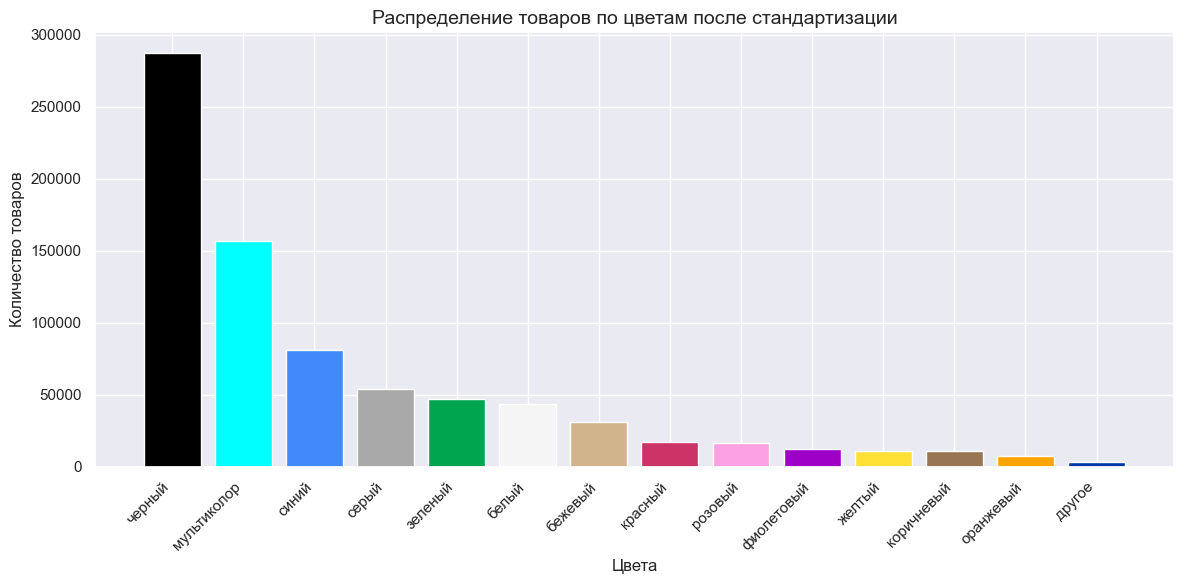

In [56]:
# Визуализируем распределение цветов
sns.set()
plt.figure(figsize=(12, 6))
colour_plot = final_colour_dist.sort_values(ascending=False)

# Создаем палитру цветов для визуализации
colour_palette = {
    'черный': 'black',
    'белый': '#f5f5f5', 
    'серый': '#a9a9a9',
    'синий': '#428afc',
    'зеленый': '#00a550',
    'красный': '#cc3366',
    'мультиколор': '#00ffff',
    'розовый': '#fba0e3',
    'желтый': '#ffe135',
    'фиолетовый': '#9f00c5',
    'бежевый': '#d2b48c',
    'коричневый': '#987654',
    'оранжевый': '#ffa500',
    'другое': '#0038a8'
}

colors = [colour_palette.get(colour, 'x') for colour in colour_plot.index]

plt.bar(colour_plot.index, colour_plot.values, color=colors)
plt.title('Распределение товаров по цветам после стандартизации', fontsize=14)
plt.xlabel('Цвета', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Распределение товаров по цветам после стандартизации.png', dpi=800, bbox_inches='tight')  
plt.show()

###  Анализ результатов преобразования

In [57]:
# Создаем статистику по всем признакам
stats_dict = {
    'Уникальные значения': update_color.nunique(),
    'Пропуски': update_color.isna().sum(),
    'Тип данных': update_color.dtypes
}

df_stats = pd.DataFrame(stats_dict)
print("Общая статистика по признакам:")
df_stats

Общая статистика по признакам:


,Уникальные значения,Пропуски,Тип данных
id,104437,0,int64
gender,2,0,int32
age,73,0,int64
education,2,0,object
city,652,0,int64
product,23109,0,object
colour,14,0,object
cost,2402,0,int64
product_sex,2,312577,float64
base_sale,2,0,int64


## Восстановление пропусков в product_sex

1. Текстовый анализ названия товара (`мужской`, `мальчиков` → 1.0, `женский`, `девочек` → 0.0)
2. Учет цвета (`розовый` → 0.0)
3. ML-модель для предсказания product_sex по другим признакам


In [58]:
# Создаем рабочую копию данных
df3 = update_color.copy()
print("Примеры данных с пропусками в product_sex:")
df3[df3['product_sex'].isna()].head()

Примеры данных с пропусками в product_sex:


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group
1,0,0,36,среднее,1201,Стол Outventure,зеленый,1499,NaN,0,37,0.5072,Активный отдых и спортинвентарь
2,0,0,36,среднее,1201,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37,0.5072,Активный отдых и спортинвентарь
3,4,0,35,среднее,1134,Роликовые коньки детские Roces Orlando III,мультиколор,9199,NaN,0,0,0.5072,Активный отдых и спортинвентарь
4,4,0,35,среднее,1134,Шлем FILA NRK FUN,белый,4999,NaN,0,0,0.5072,Активный отдых и спортинвентарь
5,4,0,35,среднее,1134,Роликовые коньки детские Roces Yuma TIF,мультиколор,6999,NaN,0,1,0.5072,Активный отдых и спортинвентарь


###  Первичное заполнение в product_sex на основе анализа текста в product

In [59]:
# Анализируем товары с пропущенным product_sex
missing_sex_products = df3['product'][df3['product_sex'].isna()].values
print('\033[1m' + "Примеры товаров с пропущенным product_sex:" + '\033[0m')
missing_sex_products[:10]

Примеры товаров с пропущенным product_sex:


array(['Стол Outventure', 'Набор Outventure: стол + 4 стула',
       'Роликовые коньки детские Roces Orlando III', 'Шлем FILA NRK FUN',
       'Роликовые коньки детские Roces Yuma TIF',
       'Набор защиты из 3-х предметов детский Reaction Rainbow',
       'Шлем для девочек Reaction Urban',
       'Роликовые коньки детские раздвижные Reaction Rainbow',
       'Куртка утепленная для девочек Outventure',
       'Кроссовки для мальчиков Geox J Sprintye Boy'], dtype=object)

In [60]:
# заполняем пропуски product_sex те, где в product указан пол
def fill_gender(value):
    
    if not isinstance(value, str):  
        return np.nan
    
    male_keywords = {'мальчиков', 'мужской'}
    female_keywords = {'девочек', 'женский'}
    
    if any(word in value.lower() for word in male_keywords):
        return 1.0
    elif any(word in value.lower() for word in female_keywords):
        return 0.0
    else:
        return np.nan

# Заполняем строки с NaN в product_sex, где в product указан пол
mask = df3['product_sex'].isna()
df3.loc[mask, 'product_sex'] = df3.loc[mask, 'product'].apply(fill_gender) 

In [61]:
print('Количество пропусков после текстового анализа:')
df3['product_sex'].isna().sum()

Количество пропусков после текстового анализа:


244850

### Заполнение в product_sex на основе цвета

In [62]:
# Анализируем розовые товары с пропущенным product_sex
print("Розовые товары с пропущенным product_sex:")
result = df3[(df3['colour'] == 'розовый') & (df3['product_sex'].isna())]
print(f"Найдено {len(result)} таких товаров")
result[['product', 'colour', 'product_group', 'gender']][:5]

Розовые товары с пропущенным product_sex:
Найдено 2383 таких товаров


,product,colour,product_group,gender
280,Панама Demix,розовый,Одежда,0
281,Панама Demix,розовый,Одежда,0
320,Рюкзак FILA,розовый,Активный отдых и спортинвентарь,0
515,"Носки Skechers, 1 пара",розовый,Одежда,0
1060,Мяч баскетбольный Li-Ning,розовый,Активный отдых и спортинвентарь,1


In [63]:
# Заполняем розовые товары как женские
mask = df3['product_sex'].isna() & (df3['colour'] == 'розовый')
df3.loc[mask, 'product_sex'] = 0.0

In [64]:
print("Количество пропусков после заполнения:")
df3['product_sex'].isna().sum()

Количество пропусков после заполнения:


242467

Смотрю корреляцию между полом покупателя и потенциальным полом покупателя, оцениваю силу корреляции, долю совпадения полов. Если корреляция высокая (связь линейная), заполняю product_sex значениями gender, иначе строю модель классификации для предсказания отсутствующих значений и оцениваю качество модели на кросс-валидационной выборке.

### Статистический анализ связи полов

Проверяем корреляцию между полом покупателя и целевым полом товара.

In [65]:
# Создаем таблицу сопряженности
cross_tab = pd.crosstab(
    index=df3['gender'], 
    columns=df3['product_sex'],
    margins=True  
)
print("Таблица сопряженности полов:")
cross_tab

Таблица сопряженности полов:


product_sex,0.0,1.0,All
gender,,,
0,179154,80859,260013
1,47068,230569,277637
All,226222,311428,537650


In [66]:
# Проверяем статистическую значимость связи
observed = cross_tab.iloc[:-1, :-1] 
chi2, p, dof, expected = chi2_contingency(observed)

# Вычисляем коэффициент φ (phi) для измерения силы связи
N = cross_tab.iloc[2, 2]  # Общее число наблюдений
phi = np.sqrt(chi2 / N)

print("Результаты статистического анализа:")
print(f"χ² (хи-квадрат) = {chi2:.3f}")
print(f"p-value = {p:.4f}")
print(f"Коэффициент Пирсона φ (phi) = {phi:.3f}")

Результаты статистического анализа:
χ² (хи-квадрат) = 148670.741
p-value = 0.0000
Коэффициент Пирсона φ (phi) = 0.526


In [67]:
# Анализируем долю совпадения полов
same_gender = df3[df3['gender'] == df3['product_sex']]
accuracy = len(same_gender) / len(df3.dropna())
print(f"Совпадение полов покупателя и товара: {accuracy:.1%}")

Совпадение полов покупателя и товара: 76.2%


Вывод: Существует статистически значимая связь средней силы между полом покупателя и целевым полом товара.

###  Построение модели машинного обучения для заполнения оставшихся пропусков в product_sex

Создаём модель бинарной классификации, обучаем на известных данных, заполняем пропуски в product_sex предсказаниями модели.

In [68]:
clean_df = df3.set_index('id').copy()

# Разделяем на обучающую и тестовую части
train_df = clean_df.dropna(subset=['product_sex'])
test_df = clean_df[clean_df['product_sex'].isna()].copy()

# Признаки и целевая переменная
X_train = train_df.drop('product_sex', axis=1)
y_train = train_df['product_sex'].astype(int)
X_test = test_df.drop('product_sex', axis=1)

# Обработка категориальных признаков
categorical_features = X_train.select_dtypes(exclude=['number']).columns.tolist()
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    if col in X_test.columns:
        X_test[col] = X_test[col].astype('category')
        
# параметры модели
params = {
    'objective': 'binary',            
    'metric': 'binary_logloss',       
    'boosting_type': 'gbdt',          
    'learning_rate': 0.05,
    'num_leaves': 31,
    'n_estimators': 100, 
    'random_state': 42,
    'verbose': -1
}

model = LGBMClassifier(**params)


# кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Метрики для оценки
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

print("Cross-validation results:\n")
print(f"Mean Train Accuracy: {cv_results['train_accuracy'].mean():.4f} ± {cv_results['train_accuracy'].std():.4f}")
print(f"Mean Test Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}\n")
print(f"Mean Train F1: {cv_results['train_f1'].mean():.4f} ± {cv_results['train_f1'].std():.4f}")
print(f"Mean Test F1: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}\n")
print(f"Mean Train ROC-AUC: {cv_results['train_roc_auc'].mean():.4f} ± {cv_results['train_roc_auc'].std():.4f}")
print(f"Mean Test ROC-AUC: {cv_results['test_roc_auc'].mean():.4f} ± {cv_results['test_roc_auc'].std():.4f}")

# обучение модели
model.fit(X_train, y_train, categorical_feature=categorical_features)

# предсказание для пропущенных значений
y_pred = model.predict(X_test)
test_df['product_sex'] = y_pred

# Объединение результата
clean_df = pd.concat([train_df, test_df]).sort_index()
clean_df.reset_index(inplace=True)  

print("\nФинальная статистика датасета:")
print(f"Размер: {clean_df.shape}")
print("\nКоличество пропусков по колонкам:")
clean_df.isna().sum()

Cross-validation results:

Mean Train Accuracy: 0.9715 ± 0.0011
Mean Test Accuracy: 0.9684 ± 0.0016

Mean Train F1: 0.9757 ± 0.0009
Mean Test F1: 0.9731 ± 0.0012

Mean Train ROC-AUC: 0.9684 ± 0.0021
Mean Test ROC-AUC: 0.9651 ± 0.0029

Финальная статистика датасета:
Размер: (780117, 13)

Количество пропусков по колонкам:


id               0
gender           0
age              0
education        0
city             0
product          0
colour           0
cost             0
product_sex      0
base_sale        0
dt               0
personal_coef    0
product_group    0
dtype: int64

### Итоги этапа восстановления product_sex

Выполнено:

    ✅ Многоэтапное восстановление 312 577 пропущенных значений

    ✅ Текстовый анализ названий товаров ('мужской', 'мальчиков' → мужские, 'женский', 'девочек' → женские)

    ✅ Анализ цвета товара (розовые товары → женские)

    ✅ Построение ML-модели с высокой точностью предсказания (97.3%)

# Блок 2 AB тестирование маркетинговой кампании

In [151]:
# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Цель исследования:

Оценка эффективности маркетинговой кампании путем сравнения ключевых метрик между тестовой группой (получила скидку) и контрольной группой.

### Подготовка данных

- Фильтруем целевых клиентов двух групп по id
- Выделяем покупки только в период маркетинговой кампании (дни 5-16)
- Присваиваем признак тестовой/контрольной группы (AB: 1 — тест, 0 — контроль)

In [152]:
# Фильтрация данных для A/B тестирования
AB_test = clean_df.copy()
AB_test = AB_test[AB_test['id'].isin(positive + negative)]
print(f"Размер датасета для A/B тестирования: {AB_test.shape}")
print(f"Уникальных клиентов в анализе: {AB_test['id'].nunique()}")
AB_test.head()

Размер датасета для A/B тестирования: (119023, 13)
Уникальных клиентов в анализе: 9916


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group
104,23,1,44,среднее,1178,Лиф женский Joss,синий,1399,0.0,1,58,0.4304,Одежда
105,23,1,44,среднее,1178,Лиф женский Joss,розовый,649,0.0,1,16,0.4304,Одежда
106,23,1,44,среднее,1178,Шорты женские Demix,черный,1999,0.0,0,16,0.4304,Одежда
285,67,1,38,среднее,1168,Фонарь кемпинговый Outventure,белый,499,1.0,0,9,0.4304,Активный отдых и спортинвентарь
286,67,1,38,среднее,1168,Матрас надувной Intex 193х127х24 см,мультиколор,3869,1.0,1,22,0.4304,Активный отдых и спортинвентарь


In [153]:
# Фильтрация данных по периоду маркетинговой кампании (дни 5-16)
sale = AB_test.copy()
sale = sale[sale['dt'].between(5, 16)] 
print(f"Покупки в период кампании: {sale.shape[0]} транзакций")

Покупки в период кампании: 44833 транзакций


In [154]:
# Создание признака группы A/B теста
sale_campaign = sale['id'].isin(positive) 
sale['AB'] = sale_campaign.astype(int)
sale['AB'] = sale['AB'].astype('int8')
print(f"Финальный размер датасета для анализа: {sale.shape}")
print(f"Распределение по группам:")
print(f"- Тестовая группа (AB=1): {sale[sale['AB'] == 1]['id'].nunique()} клиентов")
print(f"- Контрольная группа (AB=0): {sale[sale['AB'] == 0]['id'].nunique()} клиентов")
sale.head()

Финальный размер датасета для анализа: (44833, 14)
Распределение по группам:
- Тестовая группа (AB=1): 4764 клиентов
- Контрольная группа (AB=0): 4944 клиентов


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group,AB
105,23,1,44,среднее,1178,Лиф женский Joss,розовый,649,0.0,1,16,0.4304,Одежда,0
106,23,1,44,среднее,1178,Шорты женские Demix,черный,1999,0.0,0,16,0.4304,Одежда,0
285,67,1,38,среднее,1168,Фонарь кемпинговый Outventure,белый,499,1.0,0,9,0.4304,Активный отдых и спортинвентарь,1
287,67,1,38,среднее,1168,"Коврик самонадувающийся Northland, 195 см",красный,2999,1.0,0,9,0.4304,Активный отдых и спортинвентарь,1
288,67,1,38,среднее,1168,Спиннинг телескопический стеклопластиковый к/с...,мультиколор,445,1.0,1,9,0.4304,Активный отдых и спортинвентарь,1


## 1 Конверсия в покупку

In [155]:
# Разделение на тестовую и контрольную группы
test = sale[sale['AB'] == 1]
control = sale[sale['AB'] == 0] 

In [156]:
print("Размеры групп:")
print(f"Тестовая группа: {test['id'].nunique()} клиентов из {len(positive)}")
print(f"Контрольная группа: {control['id'].nunique()} клиентов из {len(negative)}")

Размеры групп:
Тестовая группа: 4764 клиентов из 4992
Контрольная группа: 4944 клиентов из 4989


In [157]:
# Создание таблицы конверсии
conv = pd.DataFrame({'покупки': [control['id'].nunique(),
                                test['id'].nunique()],
                    'без покупок': [len(negative) - control['id'].nunique(),
                                    len(positive) - test['id'].nunique()]},
                    index=['контроль', 'тест'])
conv['conversion'] = conv.iloc[:, 0] / (conv.iloc[:, 0] + conv.iloc[:, 1])
print("\nТаблица конверсии:")
conv


Таблица конверсии:


,покупки,без покупок,conversion
контроль,4944,45,0.990980
тест,4764,228,0.954327


### Статистическая значимость

In [158]:
print("Статистический анализ конверсии:")

# Критерий хи-квадрат
chi2 = chi2_contingency(conv.iloc[:, :-1])
print(f"Критерий хи-квадрат: p-value = {chi2[1]:.6f}")

if chi2[1] > 0.01:
    print(f'✅ Нет статистически значимых различий в конверсии')
else:
    print(f'❌ Обнаружены статистически значимые различия в конверсии')

# Z-тест для долей
successes = [conv.iloc[1, 0], conv.iloc[0, 0]]  # тест, контроль
nobs = [len(positive), len(negative)]
z_stat, p_value = proportions_ztest(successes, nobs)

print(f"Z-тест для долей: p-value = {p_value:.6f}")
print(f"Z-статистика: {z_stat:.4f}")

if p_value > 0.01:
    print(f'✅ Конверсии между группами статистически равны')
else:
    if z_stat > 0:
        print('📈 Конверсия тестовой группы значимо выше')
    else:
        print('📉 Конверсия контрольной группы значимо выше')

# Расчет размера эффекта
effect_size = conv.loc['тест', 'conversion'] - conv.loc['контроль', 'conversion']
print(f"Размер эффекта: {effect_size:.2%}")

Статистический анализ конверсии:
Критерий хи-квадрат: p-value = 0.000000
❌ Обнаружены статистически значимые различия в конверсии
Z-тест для долей: p-value = 0.000000
Z-статистика: -11.2253
📉 Конверсия контрольной группы значимо выше
Размер эффекта: -3.67%


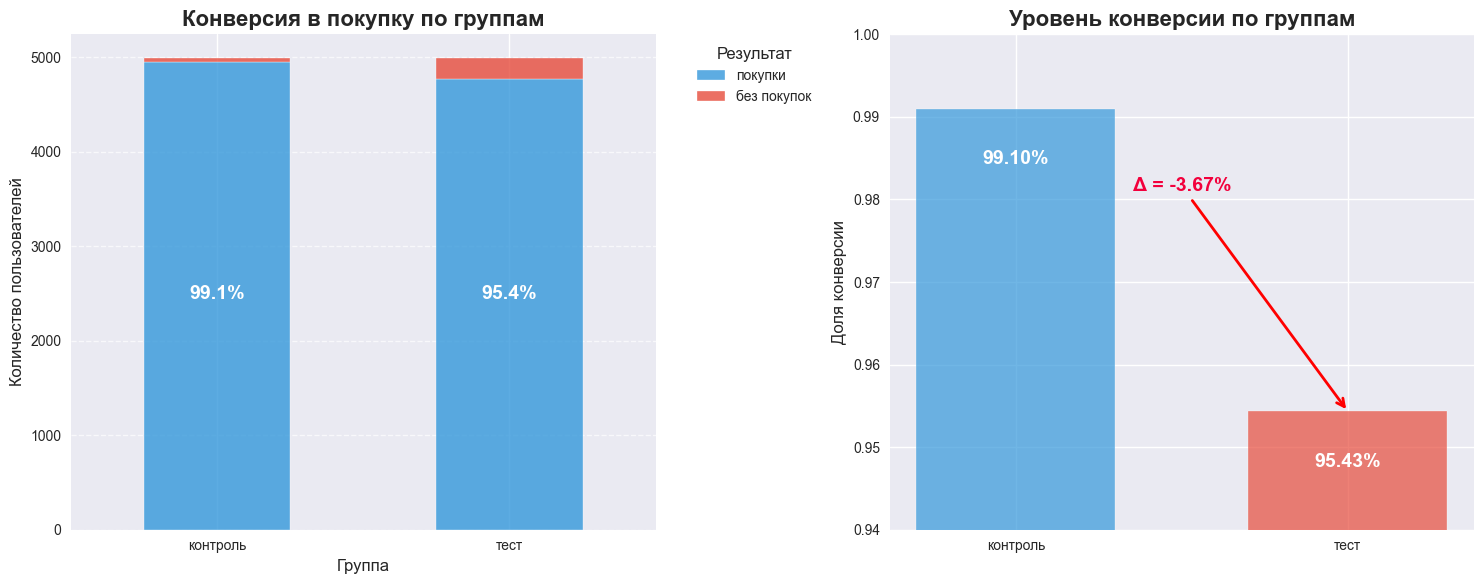

In [159]:
# Визуализация результатов конверсии
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Количество пользователей по группам
conv_plot = conv.iloc[:, :-1]
colors = ['#3498db', '#e74c3c']
conv_plot.plot(kind='bar', stacked=True, ax=ax1, color=colors, alpha=0.8)

ax1.set_title('Конверсия в покупку по группам', fontsize=16, fontweight='bold')
ax1.set_ylabel('Количество пользователей', fontsize=12)
ax1.set_xlabel('Группа', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title='Результат', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем аннотации с процентами
for i, (idx, row) in enumerate(conv.iterrows()):
    total = row['покупки'] + row['без покупок']
    ax1.text(i, total/2, f"{row['conversion']:.1%}", 
             ha='center', va='center', fontweight='bold', fontsize=14, color='white')

# График 2: Сравнение конверсий
conversion_rates = conv['conversion']
bars = ax2.bar(conversion_rates.index, conversion_rates.values, 
               color=colors, alpha=0.7, width=0.6)

ax2.set_title('Уровень конверсии по группам', fontsize=16, fontweight='bold')
ax2.set_ylabel('Доля конверсии', fontsize=12)
ax2.set_ylim(0.94, 1.0)

# Добавляем значения на столбцы
for bar, rate in zip(bars, conversion_rates):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height - 0.005,
             f'{rate:.2%}', ha='center', va='top', fontweight='bold', fontsize=14,
             color='white')

# Добавляем стрелку для размера эффекта
ax2.annotate(f'Δ = {effect_size:.2%}', xy=(1, conversion_rates['тест']), 
             xytext=(0.5, conversion_rates['контроль'] - 0.01),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=14, fontweight='bold', color='#f2003c', ha='center')

plt.tight_layout()

# Сохранение графиков
plt.savefig('conversion_analysis.png', dpi=800, bbox_inches='tight')
plt.show()

### ✅ Вывод:

__Метрика__: Конверсия в покупку в период кампании\
__Результат__: ❌ Отрицательный эффект\
__Размер эффекта__: -3.67% (статистически значимый)

## 2 Совокупная выручка и количество заказов

In [160]:
# Агрегация выручки и кол-ва покупок по группам
general = sale.groupby('AB').agg({'cost': ['sum', 'count']})
general.index = general.index.map({0: 'Контроль', 1: 'Тест'})
print("Совокупные показатели по группам:")
general

Совокупные показатели по группам:


cost       
                sum  count
AB                        
Контроль  110927321  19862
Тест      132489375  24971

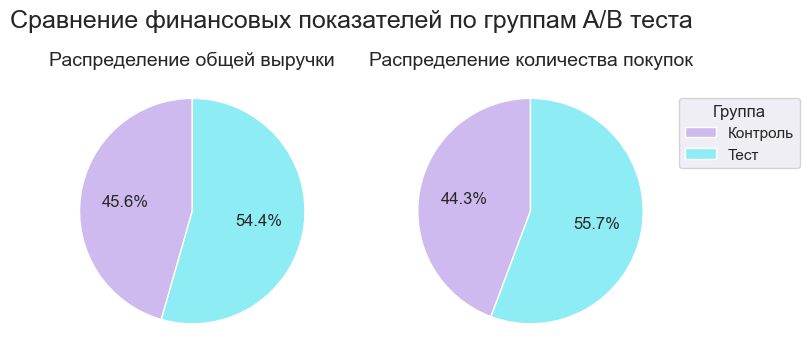

In [161]:
# Визуализация распределения выручки и количества покупок
gen_sum = general[('cost', 'sum')]
gen_count = general[('cost', 'count')]

sns.set()
colors=['#cfbaf0', '#8eecf5']
autopct='%.1f%%'
startangle=90
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].pie(
    gen_sum,
    autopct=autopct,
    colors=colors,
    startangle=startangle,
    textprops={'fontsize': 12})
ax[0].set_title('Распределение общей выручки', fontsize=14, pad=4)

ax[1].pie(
    gen_count,
    autopct=autopct,
    colors=colors,
    startangle=startangle,
    textprops={'fontsize': 12})
ax[1].set_title('Распределение количества покупок', fontsize=14, pad=4)

plt.legend(
    title='Группа',
    bbox_to_anchor=(1.0, 0.93),
    labels=general.index,
    frameon=True)

plt.suptitle('Сравнение финансовых показателей по группам A/B теста', fontsize=18, y = 1.0)
plt.savefig('Выручка, число покупок.png', dpi=800, bbox_inches='tight')  
plt.show()

In [162]:
gen_sum

AB
Контроль    110927321
Тест        132489375
Name: (cost, sum), dtype: int64

In [163]:
print(f"СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
# Разница и относительное изменение по выручке
revenue_diff = gen_sum['Тест'] - gen_sum['Контроль']
revenue_pct = revenue_diff / gen_sum['Контроль']

# Разница и относительное изменение по количеству покупок
orders_diff = gen_count['Тест'] - gen_count['Контроль']
orders_pct = orders_diff / gen_count['Контроль']

print(f"• Разница в выручке: {revenue_diff: ,.0f} руб. ({revenue_pct:+.1%})")
print(f"• Разница в количестве покупок: {orders_diff: ,} ({orders_pct:+.1%})")

СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
• Разница в выручке:  21,562,054 руб. (+19.4%)
• Разница в количестве покупок:  5,109 (+25.7%)


## 3 Средняя выручка на клиента в группе

In [164]:
# Функция для расчета выручки на клиента
def get_rpc_data(AB, ids):
    """Расчет выручки на клиента с включением нулевых значений"""
    
    revenue = AB.groupby('id')['cost'].sum()
    all_data = pd.Series(0, index=ids)
    all_data.update(revenue)
    return all_data

test_all = get_rpc_data(test, positive)
control_all = get_rpc_data(control, negative)

In [165]:
# функция для проверки данных на нормальность распределения 
def distr_data(data_test, data_control):
    """
    Проверяет нормальность распределения данных.
    
    Для выборок < 5000 использует тест Шапиро-Уилка,
    для больших выборок - тест нормальности.
    """
    if len(data_test) & len(data_control) < 5000:
        stat, p_value = shapiro(data_test.values)
        stat, p_value = shapiro(data_control.values)
        return f'''p-value тестовой группы: {p_value:.4f}
p-value контрольной группы: {p_value:.4f}'''
    else:
        stat, p_value = normaltest(data_test.values)
        stat, p_value = normaltest(data_control.values)
        
        return f'''p-value тестовой группы: {p_value:.4f}
p-value контрольной группы: {p_value:.4f}'''

In [166]:
print("Проверка нормальности распределения:")
print(distr_data(test_all, control_all))

Проверка нормальности распределения:
p-value тестовой группы: 0.0000
p-value контрольной группы: 0.0000


In [167]:
# выборки независимые, данные не имеют нормальное распределения, применим тест Манна-Уитни для сравнения медиан двух групп
print("СРАВНЕНИЕ ВЫРУЧКИ НА КЛИЕНТА:")
print("=" * 40)

u_stat, p_value = mannwhitneyu(test_all.values, control_all.values, alternative='greater')

if p_value > 0.01:
    print(f"✅ Нет статистически значимой разницы (p-value = {p_value:.4f})")
    print("Выручка на клиента в тестовой группе НЕ превышает контрольную")
else:
    print(f"📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = {p_value:.4f})")
    print("Выручка на клиента в тестовой группе ЗНАЧИМО ВЫШЕ")

СРАВНЕНИЕ ВЫРУЧКИ НА КЛИЕНТА:
📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = 0.0000)
Выручка на клиента в тестовой группе ЗНАЧИМО ВЫШЕ


In [168]:
# Расчет описательных статистик
stats_test = test_all.agg(['mean', 'median', 'std', 'max'])
stats_control = control_all.agg(['mean', 'median', 'std', 'max'])

revenue_per_customer = pd.DataFrame({
    'Тест': stats_test.round(2),
    'Контроль': stats_control.round(2)
})

print("ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ:")
revenue_per_customer

ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ:


,Тест,Контроль
mean,26540.34,22234.38
median,14497.00,10848.00
std,41078.02,39048.40
max,1212707.00,813391.00


In [169]:
# Расчет относительной разницы
revenue_diff_percent = (revenue_per_customer.loc['mean', 'Тест'] - revenue_per_customer.loc['mean', 'Контроль']) / revenue_per_customer.loc[
    'mean', 'Контроль'] * 100
print(f"Относительная разница в средней выручке: {revenue_diff_percent:+.1f}%")

Относительная разница в средней выручке: +19.4%


### ✅ Вывод:

__Метрика__: Средняя выручка на клиента в группе\
__Результат__: ✔️Положительный эффект\
__Размер эффекта__: +19.4% (статистически значимый)

## 4 Средняя выручка на совершившего покупку клиента

In [170]:
# Выручка только для клиентов, совершивших покупки
purchase_test = test.groupby('id')['cost'].sum()
purchase_control = control.groupby('id')['cost'].sum()

In [171]:
# проверка нормальности распределения
print(distr_data(purchase_test, purchase_control))

p-value тестовой группы: 0.0000
p-value контрольной группы: 0.0000


In [172]:
# сравнение средних двух независимых выборок с распределением, не принадлежащим нормальному
u_stat, p_value = mannwhitneyu(purchase_test, purchase_control, alternative='greater')

print("СРАВНЕНИЕ ВЫРУЧКИ ПОКУПАЮЩИХ КЛИЕНТОВ:")
print("=" * 50)

if p_value > 0.01:
    print(f"✅ Нет статистически значимой разницы (p-value = {p_value:.4f})")
else:
    print(f"📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = {p_value:.4f})")
    print("Выручка на покупающего клиента в тестовой группе ЗНАЧИМО ВЫШЕ")

СРАВНЕНИЕ ВЫРУЧКИ ПОКУПАЮЩИХ КЛИЕНТОВ:
📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = 0.0000)
Выручка на покупающего клиента в тестовой группе ЗНАЧИМО ВЫШЕ


In [173]:
# Расчет статистик для покупающих клиентов
stats_purchase_test = purchase_test.agg(['mean', 'median', 'std', 'min', 'max'])
stats_purchase_control = purchase_control.agg(['mean', 'median', 'std', 'min', 'max'])

In [174]:
revenue_per_buyer = pd.DataFrame({
    'Тест': stats_purchase_test.round(2),
    'Контроль': stats_purchase_control.round(2)
})

print("ВЫРУЧКА НА ПОКУПАЮЩЕГО КЛИЕНТА:")
print('=' *31)
revenue_per_buyer

ВЫРУЧКА НА ПОКУПАЮЩЕГО КЛИЕНТА:


,Тест,Контроль
mean,27810.53,22436.76
median,15594.50,10999.00
std,41627.47,39167.81
min,119.00,59.00
max,1212707.00,813391.00


In [175]:
# Расчет разницы для покупающих клиентов
revenue_buyer_diff = (revenue_per_buyer.loc['mean', 'Тест'] - revenue_per_buyer.loc['mean', 'Контроль']
                     ) / revenue_per_buyer.loc[
    'mean', 'Контроль'] * 100
print(f"Относительная разница в выручке покупающих клиентов: {revenue_buyer_diff:+.1f}%")

Относительная разница в выручке покупающих клиентов: +24.0%


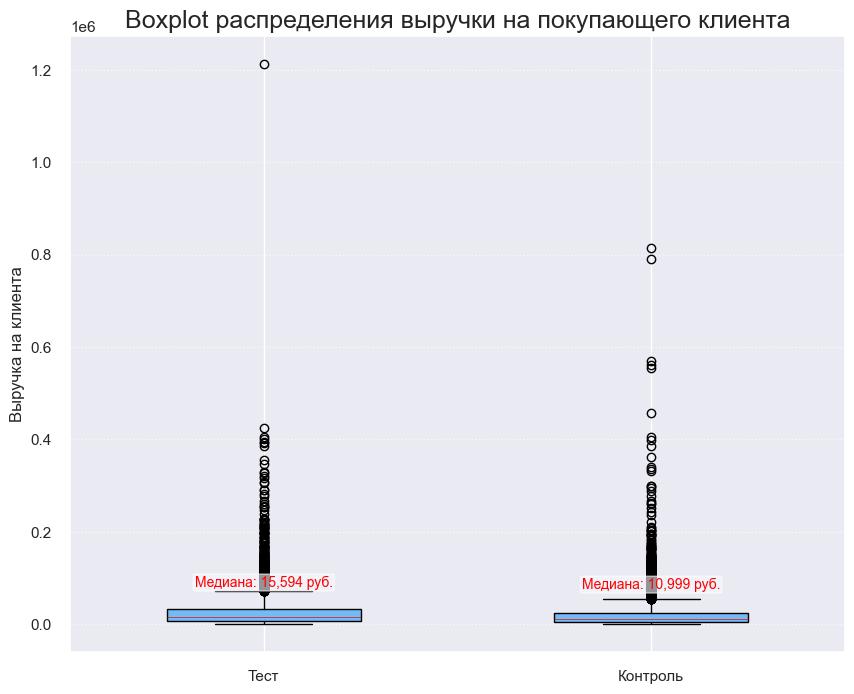

In [176]:
plt.figure(figsize=(10, 8))
plt.boxplot([purchase_test, purchase_control],
            tick_labels=['Тест', 'Контроль'],
            patch_artist=True,
            widths = 0.5,
            medianprops=dict(color='#ff0000', linewidth=0.5),
            boxprops=dict(facecolor='#71bbf7'),
           )
plt.title('Boxplot распределения выручки на покупающего клиента', fontsize=18)
plt.ylabel('Выручка на клиента')
plt.grid(axis='y', linestyle=':', alpha=0.7)

# Добавляем аннотации с медианами
medians = [np.median(purchase_test), np.median(purchase_control)]

vshift=9**5
for i, median in enumerate(medians):
    plt.text(i+1, median+vshift, f'Медиана: {median:,.0f} руб.', 
             ha='center', va='bottom', fontsize=10, color='#ff0000',
            bbox=dict(boxstyle="round, pad=0.1", facecolor='#f8f8ff', alpha=0.6))

plt.savefig('Выручка на клиента', dpi=800, bbox_inches='tight')  
plt.show()

### ✅ Вывод:

__Метрика__: Средняя выручка на покупающего клиента в группе\
__Результат__: ✔️ Положительный эффект\
__Размер эффекта__: +24.0% (статистически значимый)

## Сегментированная выручка по категориям товаров, возрасту и полу

<span style="color:#00b7eb;
             font-weight:bold;
             font-size:20px;
             text-shadow: 3px 3px 5px #c4c3d0;">Сегментация по товарным категориям.</span>

In [177]:
# сегментированный доход по группе товара
product_revenue = pd.pivot_table(sale,
              values='cost',
              index=['AB'],
              columns='product_group',
              aggfunc='sum')
print("Выручка по товарным категориям:")
product_revenue

Выручка по товарным категориям:


product_group,Активный отдых и спортинвентарь,Обувь,Одежда,Транспорт и водные виды
AB,,,,
0,16708333,38861606,30315612,25041770
1,21419119,47493077,39337865,24239314


In [178]:
# Анализ изменений по товарным категориям
percent_change = (product_revenue.iloc[1] - product_revenue.iloc[0]) / product_revenue.iloc[0] * 100
abs_change = (product_revenue.iloc[1] - product_revenue.iloc[0])

In [179]:
print("ИЗМЕНЕНИЯ ВЫРУЧКИ ПО КАТЕГОРИЯМ:")
print("=" * 45)
for category in percent_change.sort_values(ascending=False).index:
    pct = percent_change[category]
    abs_val = abs_change[category]
    direction = "↑" if pct > 0 else "↓"
    print(f"{category:<35} {direction} {abs(pct):.1f}% ({abs_val:+,.0f} руб.)")

ИЗМЕНЕНИЯ ВЫРУЧКИ ПО КАТЕГОРИЯМ:
Одежда                              ↑ 29.8% (+9,022,253 руб.)
Активный отдых и спортинвентарь     ↑ 28.2% (+4,710,786 руб.)
Обувь                               ↑ 22.2% (+8,631,471 руб.)
Транспорт и водные виды             ↓ 3.2% (-802,456 руб.)


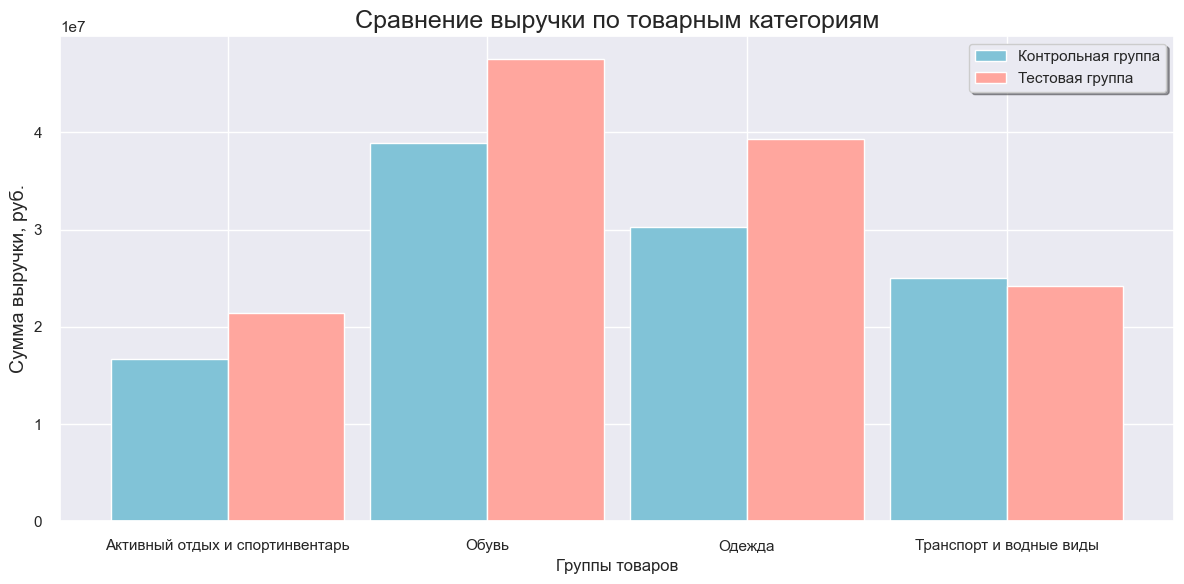

In [180]:
# Визуализация выручки по товарным категориям
sns.set()
plt.figure(figsize=(12, 6))

bar_width = 0.45
index = np.arange(len(product_revenue.columns))

plt.bar(
    index, 
    product_revenue.values[0], 
    bar_width, 
    color='#81c3d7', 
    label='Контрольная группа'
)

plt.bar(
    index + bar_width, 
    product_revenue.values[1], 
    bar_width, 
    color='#ffa69e', 
    label='Тестовая группа'
)

plt.xticks(index + bar_width / 2, [str(x) for x in product_revenue.columns], rotation=0)
plt.title('Сравнение выручки по товарным категориям', fontsize=18)
plt.xlabel('Группы товаров', fontsize=12)
plt.ylabel('Сумма выручки, руб.', fontsize=14)

plt.grid(True)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.savefig('Сравнение выручки по товарным категориям.png', dpi=800, bbox_inches='tight')  
plt.show()

<span style="color:#00b7eb;
             font-weight:bold;
             font-size:20px;
             text-shadow: 3px 3px 5px #c4c3d0;">Сегментация по полу</span>

In [181]:
# Анализ выручки по полу
gender_revenue = pd.pivot_table(sale,
              values='cost',
              index=['AB'],
              columns='gender',
              aggfunc='sum')
gender_revenue.index = gender_revenue.index.map({0: 'контроль', 1: 'тест'})
gender_revenue.columns = gender_revenue.columns.map({0.0: 'женщины', 1.0: 'мужчины'})
print("ВЫРУЧКА ПО ПОЛУ:")
print("=" * 30)
gender_revenue

ВЫРУЧКА ПО ПОЛУ:


gender,женщины,мужчины
AB,,
контроль,39923209,71004112
тест,41938740,90550635


In [182]:
# Анализ изменений по полу
percent_gender = (gender_revenue.iloc[1] - gender_revenue.iloc[0]) / gender_revenue.iloc[0] * 100
abs_gender = (gender_revenue.iloc[1] - gender_revenue.iloc[0])

print("ИЗМЕНЕНИЯ ВЫРУЧКИ ПО ПОЛУ:")
print("=" * 35)
for gender in percent_gender.index:
    pct = percent_gender[gender]
    abs_val = abs_gender[gender]
    direction = "↑" if pct > 0 else "↓"
    print(f"  {gender:<10} {direction} {abs(pct):.1f}% ({abs_val:+,.0f} руб.)")

ИЗМЕНЕНИЯ ВЫРУЧКИ ПО ПОЛУ:
  женщины    ↑ 5.0% (+2,015,531 руб.)
  мужчины    ↑ 27.5% (+19,546,523 руб.)


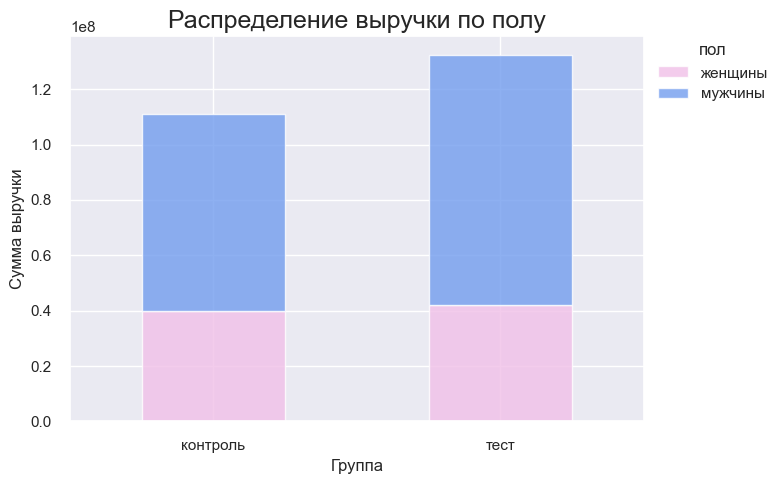

In [183]:
sns.set()
gender_revenue.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#f1c0e8', '#729dee'], alpha=0.8)
plt.title('Распределение выручки по полу', fontsize=18)
plt.xlabel('Группа', fontsize=12)
plt.ylabel('Сумма выручки', fontsize=12)
plt.legend(title='пол', bbox_to_anchor=(1.0, 1.018))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Распределение выручки по полу.png', dpi=800, bbox_inches='tight')  
plt.show()

<span style="color:#00b7eb;
             font-weight:bold;
             font-size:20px;
             text-shadow: 3px 3px 5px #c4c3d0;">Сегментация по возрасту</span>

In [184]:
# Создание возрастных групп
bins = [4, 18, 30, 45, 60, 120] 
labels = ['Дети (до 18)', 'Молодёжь(19-30)', 'Взрослые(31-45)', 'Старшее поколение(46-60)', 'Пенсионеры(>60)']

sale.loc[:, 'age_group'] = pd.cut(sale['age'], bins=bins, labels=labels, include_lowest=True)

In [185]:
# Анализ выручки по возрастным группам
age_revenue = pd.pivot_table(sale,
              values='cost',
              index=['AB'],
              columns='age_group',
              aggfunc='sum',
            observed=False)
age_revenue.index = age_revenue.index.map({0: 'control', 1: 'test'})
print("ВЫРУЧКА ПО ВОЗРАСТНЫМ ГРУППАМ:")
print("=" * 35)
age_revenue

ВЫРУЧКА ПО ВОЗРАСТНЫМ ГРУППАМ:


age_group,Дети (до 18),Молодёжь(19-30),Взрослые(31-45),Старшее поколение(46-60),Пенсионеры(>60)
AB,,,,,
control,6527329,22074017,54486487,23719086,4120402
test,7392979,27827248,60937889,30806253,5525006


In [186]:
# Анализ изменений по возрасту
percent_age = (age_revenue.iloc[1] - age_revenue.iloc[0]) / age_revenue.iloc[0] * 100
abs_age = age_revenue.iloc[1] - age_revenue.iloc[0]

print("ИЗМЕНЕНИЯ ВЫРУЧКИ ПО ВОЗРАСТУ:")
print("=" * 40)
for age_group in percent_age.sort_values(ascending=False).index:
    pct = percent_age[age_group]
    abs_val = abs_age[age_group]
    direction = "↑" if pct > 0 else "↓"
    print(f"{age_group:<25} {direction} {abs(pct):.1f}% ({abs_val:+,.0f} руб.)")

ИЗМЕНЕНИЯ ВЫРУЧКИ ПО ВОЗРАСТУ:
Пенсионеры(>60)           ↑ 34.1% (+1,404,604 руб.)
Старшее поколение(46-60)  ↑ 29.9% (+7,087,167 руб.)
Молодёжь(19-30)           ↑ 26.1% (+5,753,231 руб.)
Дети (до 18)              ↑ 13.3% (+865,650 руб.)
Взрослые(31-45)           ↑ 11.8% (+6,451,402 руб.)


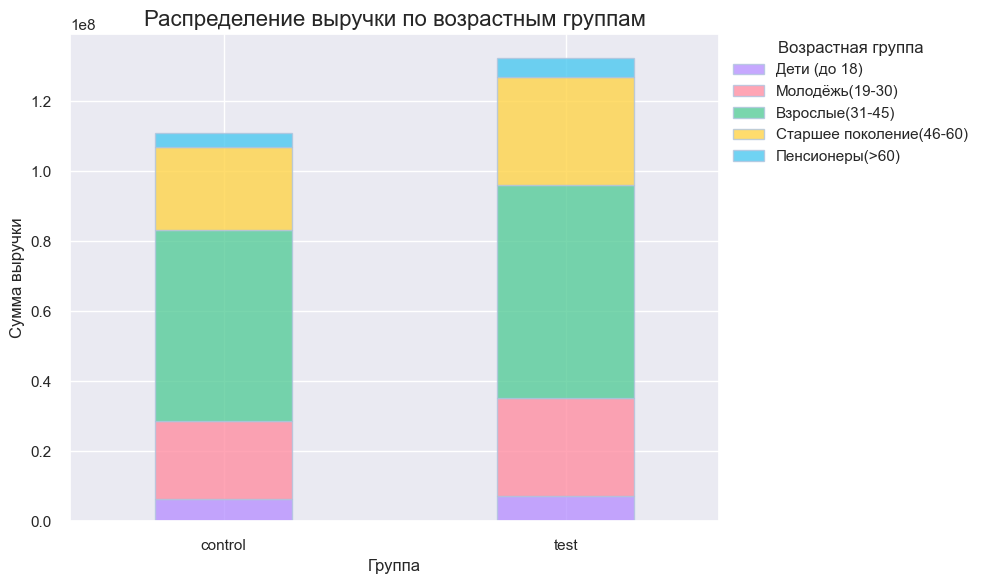

In [187]:
sns.set()
age_revenue.plot(kind='bar', stacked=True, figsize=(10, 6), 
                 color=['#b892ff', '#ff8fa3', '#57cc99', '#ffd449', '#4cc9f0'],
                 alpha=0.8,
                 width=0.4,
                 edgecolor='#b0c4de', )

plt.title('Распределение выручки по возрастным группам', fontsize=16)
plt.xlabel('Группа', fontsize=12)
plt.ylabel('Сумма выручки', fontsize=12)
plt.legend(title='Возрастная группа', 
          bbox_to_anchor=(1.0, 1.015))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Распределение выручки по возрасту.png', dpi=800, bbox_inches='tight')  
plt.show()

### Сегментированная выручка по товарным категориям, полу, возрасту:
✅ Основной вклад в увеличение выручки внесли мужчины старше 19 лет, покупающие _**Одежду**_, _**Обувь**_ и _**Товары для активного отдыха и спортинвентарь**_.

## 6 Средний чек покупки

In [188]:
# Проверка нормальности распределения
print("Проверка нормальности распределения среднего чека:")
print(distr_data(test['cost'], control['cost']))

Проверка нормальности распределения среднего чека:
p-value тестовой группы: 0.0000
p-value контрольной группы: 0.0000


In [189]:
# Статистическое сравнение
u_stat, p_value = mannwhitneyu(test['cost'], control['cost'], alternative='less')
print(f"СРАВНЕНИЕ СРЕДНЕГО ЧЕКА:")
print("=" * 30)
if p_value > 0.01:
    print(f"✅ Нет статистически значимой разницы (p-value = {p_value:.4f})")
    print("Средний чек покупки тестовой группы равен контрольной")
else:
    print(f"📉 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = {p_value:.4f})")
    print("Средний чек покупки тестовой группы МЕНЬШЕ контрольной")

СРАВНЕНИЕ СРЕДНЕГО ЧЕКА:
📉 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = 0.0002)
Средний чек покупки тестовой группы МЕНЬШЕ контрольной


In [190]:
# медиана и среднее среднего чека
a = test['cost'].agg(['mean', 'median'])
b = control['cost'].agg(['mean', 'median'])
revenue_average = pd.DataFrame({'тест': a, 'контроль': b}).round(2)
revenue_average

,тест,контроль
mean,5305.73,5584.9
median,2999.00,3009.0


In [191]:
revenue_average_percent = (revenue_average.iloc[0, 0] - revenue_average.iloc[0, 1]) / revenue_average.iloc[0, 1] * 100
revenue_average_percent

-4.9986570932335415

In [192]:
print(f"СРЕДНИЙ ЧЕК:")
print(f"• {'Тестовая группа:':<25} {revenue_average.iloc[0, 0]:,.0f} руб. (медиана: {revenue_average.iloc[1, 0]:,.0f} руб.)")
print(f"• {'Контрольная группа:':<25} {revenue_average.iloc[0, 1]:,.0f} руб. (медиана: {revenue_average.iloc[1, 1]:,.0f} руб.)")
print(f"• {'Относительная разница:':<25} {revenue_average_percent:+.1f}%")

СРЕДНИЙ ЧЕК:
• Тестовая группа:          5,306 руб. (медиана: 2,999 руб.)
• Контрольная группа:       5,585 руб. (медиана: 3,009 руб.)
• Относительная разница:    -5.0%


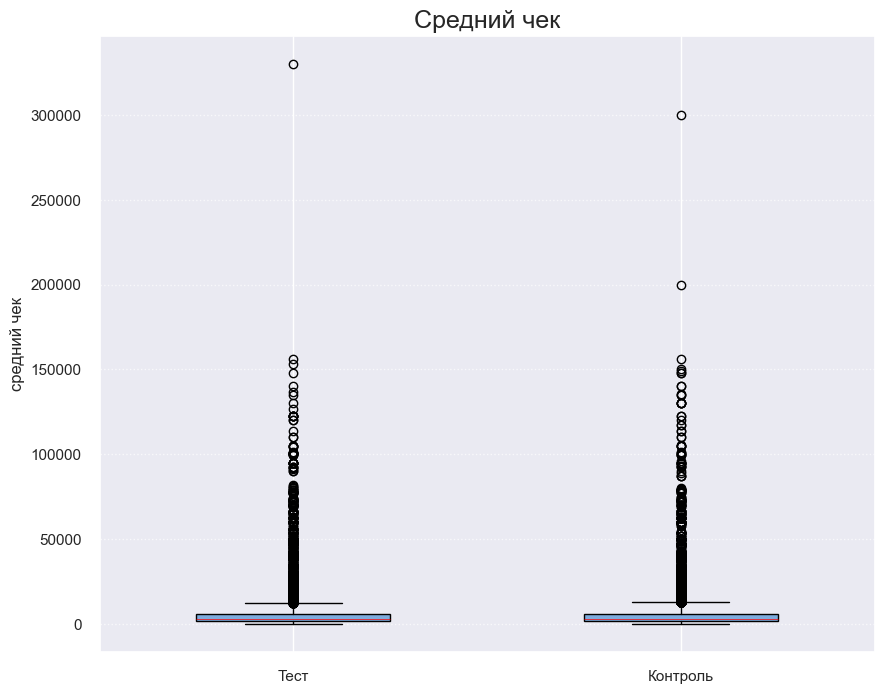

In [193]:
plt.figure(figsize=(10, 8))
plt.boxplot([test['cost'], control['cost']],
            tick_labels=['Тест', 'Контроль'],
            patch_artist=True,
            widths = 0.5,
            medianprops=dict(color='#ff0000', linewidth=0.5),
            boxprops=dict(facecolor='#7dabdd'),
           )
plt.title('Средний чек', fontsize=18)
plt.ylabel('средний чек')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.savefig('Boxplot средний чек.png', dpi=800, bbox_inches='tight')  
plt.show()

### ✅ Вывод:

__Метрика__: Средний чек\
__Результат__: ❌ Отрицательный эффект\
__Размер эффекта__: -5% (статистически значимый)

## 7 Среднее количество заказов на клиента в группе

In [194]:
# создаем серии с кол-ом покупок всех клиентов тестовой и контрольной групп
def get_count_purch(AB, ids):

    count_purch = AB.groupby('id')['cost'].count()
    all_data = pd.Series(0, index=ids)
    all_data.update(count_purch)
    return all_data

test_purch_count = get_count_purch(test, positive)
control_purch_count = get_count_purch(control, negative)

In [195]:
# проверка нормальности распределения данных
print(distr_data(test_purch_count, control_purch_count))

p-value тестовой группы: 0.0000
p-value контрольной группы: 0.0000


In [196]:
print("ЧАСТОТА ПОКУПОК (ВСЕ КЛИЕНТЫ):")
print("=" * 40)
u_stat, p_value = mannwhitneyu(test_purch_count.values, control_purch_count.values, alternative='greater')

if p_value > 0.01:
    print(f"✅ Нет значимых различий (p-value = {p_value:.4f})")
else:
    print(f"📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = {p_value:.4f})")
    print("Количество покупок на клиента в тестовой группе БОЛЬШЕ")

ЧАСТОТА ПОКУПОК (ВСЕ КЛИЕНТЫ):
📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = 0.0000)
Количество покупок на клиента в тестовой группе БОЛЬШЕ


In [197]:
a = test_purch_count.agg(['mean', 'median'])
b = control_purch_count.agg(['mean', 'median'])
frequency_purch_all = pd.DataFrame({'тест': a, 'контроль': b}).round(2)
frequency_purch_all

,тест,контроль
mean,5.0,3.98
median,3.0,2.00


In [198]:
print(f"ЧАСТОТА ПОКУПОК:")
print(f"• {'Тестовая группа:':<25} {frequency_purch_all.iloc[0, 0]:.1f} покупок/клиента")
print(f"• {'Контрольная группа:':<25} {frequency_purch_all.iloc[0, 1]:.1f} покупок/клиента")
diff_all = ((frequency_purch_all.iloc[0, 0] - frequency_purch_all.iloc[0, 1]) / frequency_purch_all.iloc[0, 1] * 100)
print(f"• {'Относительная разница:':<25} {diff_all:+.1f}%")

ЧАСТОТА ПОКУПОК:
• Тестовая группа:          5.0 покупок/клиента
• Контрольная группа:       4.0 покупок/клиента
• Относительная разница:    +25.6%


### ✅ Вывод:

__Метрика__: Частота покупок\
__Результат__: ✔️ Положительный эффект\
__Размер эффекта__: +25.6% (статистически значимый)

## 8 Среднее количество заказов на клиента, совершившего покупку

In [199]:
id_purchase_test = test.groupby('id')['cost'].count()
id_purchase_control = control.groupby('id')['cost'].count()

In [200]:
# проверка нормальности распределения
print(distr_data(id_purchase_test, id_purchase_control))

p-value тестовой группы: 0.0000
p-value контрольной группы: 0.0000


In [201]:
print("ЧАСТОТА ПОКУПОК СРЕЛИ ПОКУПАЮЩИХ КЛИНТОВ:")
print("=" * 40)
u_stat, p_value = mannwhitneyu(id_purchase_test, id_purchase_control, alternative='greater')

if p_value > 0.01:
    print(f"✅ Нет значимых различий (p-value = {p_value:.4f})")
else:
    print(f"📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = {p_value:.4f})")
    print("Количество покупок на клиента среди покупающих в тестовой группе БОЛЬШЕ")

ЧАСТОТА ПОКУПОК СРЕЛИ ПОКУПАЮЩИХ КЛИНТОВ:
📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ (p-value = 0.0000)
Количество покупок на клиента среди покупающих в тестовой группе БОЛЬШЕ


In [202]:
# среднее и медиана покупок на человека в группах среди оформивших покупку
freq_purchase =  pd.pivot_table(sale,
              values='cost',
              index=['id', 'AB'],
              aggfunc='count').groupby('AB').agg(['mean', 'median']).round(2)
freq_purchase = freq_purchase.rename(index={'тест': 1, 'контроль': 0})
freq_purchase

cost       
    mean median
AB             
0   4.02    2.0
1   5.24    4.0

In [203]:
print(f"ЧАСТОТА ПОКУПОК СРЕДИ ПОКУПАЮЩИХ КЛИЕНТОВ:")
print(f"• {'Тестовая группа:':<25} {freq_purchase.iloc[0, 0]:.1f} покупок/клиента")
print(f"• {'Контрольная группа:':<25} {freq_purchase.iloc[0, 1]:.1f} покупок/клиента")
diff = ((freq_purchase.iloc[1, 0] - freq_purchase.iloc[0, 0]) / freq_purchase.iloc[0, 0] * 100)
print(f"• {'Относительная разница:':<25} {diff:+.1f}%")

ЧАСТОТА ПОКУПОК СРЕДИ ПОКУПАЮЩИХ КЛИЕНТОВ:
• Тестовая группа:          4.0 покупок/клиента
• Контрольная группа:       2.0 покупок/клиента
• Относительная разница:    +30.3%


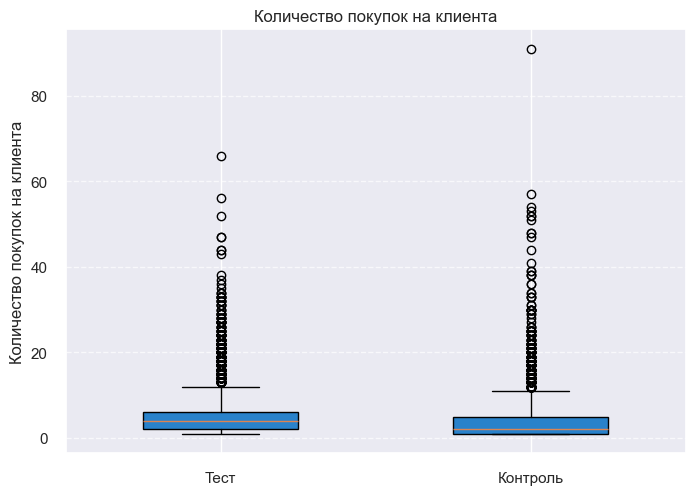

In [204]:
plt.boxplot([id_purchase_test, id_purchase_control],
            tick_labels=['Тест', 'Контроль'],
           widths=0.5,
           patch_artist=True,
           boxprops=dict(facecolor='#2982cb'),)
plt.title('Количество покупок на клиента')
plt.ylabel('Количество покупок на клиента')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Boxplot кол-во покупок на клиента.png', dpi=800, bbox_inches='tight')  
plt.show()

### ✅ Вывод:

__Метрика__: Средняя частота покупок на покупающего клиента в группе\
__Результат__: ✔️ Положительный эффект\
__Размер эффекта__: +30.3% (статистически значимый)

## Частота покупок (сегментация по товарным категориям, полу и возрасту)

<span style="color:#00b7eb;
             font-weight:bold;
             font-size:20px;
             text-shadow: 3px 3px 5px #c4c3d0;">Частота покупок по категориям товара</span>

In [205]:
# сегментация частоты покупок по товарным категориям
count_cost = pd.pivot_table(sale,
                           values='cost',
                           columns='product_group',
                           index='AB',
                           aggfunc='count')
count_cost

product_group,Активный отдых и спортинвентарь,Обувь,Одежда,Транспорт и водные виды
AB,,,,
0,3408,6004,9086,1364
1,4253,7437,11752,1529


In [206]:
# Анализ изменений частоты покупок по категориям
percent_purchase = (count_cost.iloc[1] - count_cost.iloc[0]) / count_cost.iloc[0] * 100
abs_purchase = count_cost.iloc[1] - count_cost.iloc[0]

print("ИЗМЕНЕНИЯ ЧАСТОТЫ ПОКУПОК ПО КАТЕГОРИЯМ:")
print("=" * 60)
for category in percent_purchase.sort_values(ascending=False).index:
    pct = percent_purchase[category]
    abs_val = abs_purchase[category]
    direction = "↑" if pct > 0 else "↓"
    print(f"{category:<35} {direction} {abs(pct):.1f}% ({abs_val:+,} покупок)")

print(f"\nОБЩИЙ РОСТ ЧАСТОТЫ ПОКУПОК: {percent_purchase.mean():.1f}%")

ИЗМЕНЕНИЯ ЧАСТОТЫ ПОКУПОК ПО КАТЕГОРИЯМ:
Одежда                              ↑ 29.3% (+2,666 покупок)
Активный отдых и спортинвентарь     ↑ 24.8% (+845 покупок)
Обувь                               ↑ 23.9% (+1,433 покупок)
Транспорт и водные виды             ↑ 12.1% (+165 покупок)

ОБЩИЙ РОСТ ЧАСТОТЫ ПОКУПОК: 22.5%


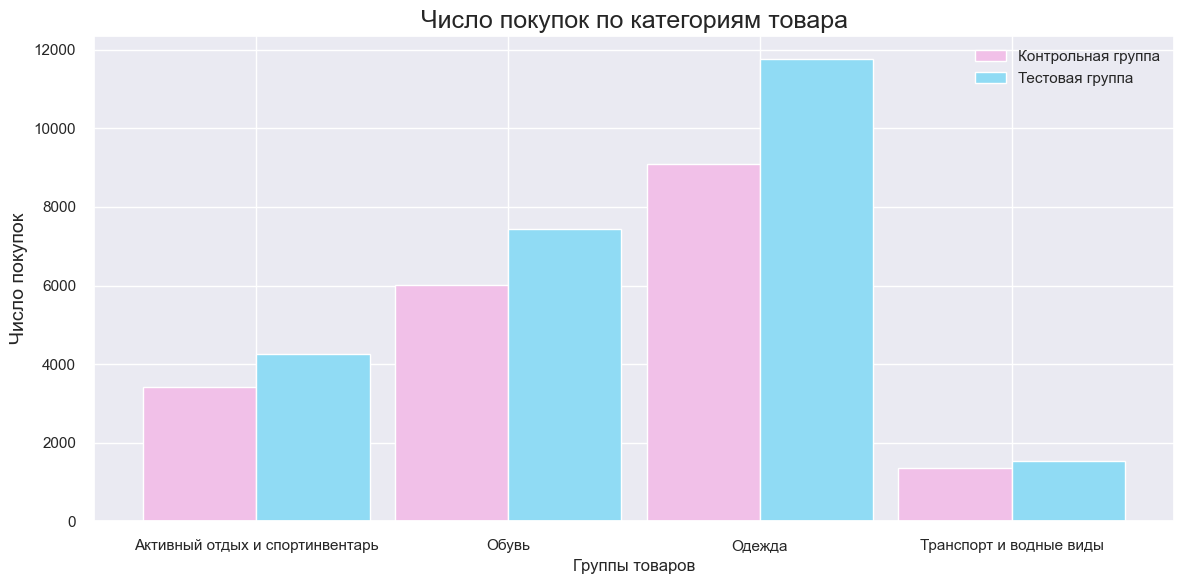

In [207]:
sns.set()
plt.figure(figsize=(12, 6))

bar_width = 0.45
index = np.arange(len(count_cost.columns))

plt.bar(
    index, 
    count_cost.values[0], 
    bar_width, 
    color='#f1c0e8', 
    label='Контрольная группа'
)

plt.bar(
    index + bar_width, 
    count_cost.values[1], 
    bar_width, 
    color='#90dbf4', 
    label='Тестовая группа'
)

plt.xticks(index + bar_width / 2, [str(x) for x in count_cost.columns], rotation=0)
plt.title('Число покупок по категориям товара', fontsize=18)
plt.xlabel('Группы товаров', fontsize=12)
plt.ylabel('Число покупок', fontsize=14)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Кол-во покупок по группам товара.png', dpi=800, bbox_inches='tight')  
plt.show()

<span style="color:#00b7eb;
             font-weight:bold;
             font-size:20px;
             text-shadow: 3px 3px 5px #c4c3d0;">Частота покупок по полу.</span>

In [208]:
count_cost_gender = pd.pivot_table(
    sale,
    values='cost',
    columns='gender',
    index='AB',
    aggfunc='count')
count_cost_gender.index = count_cost_gender.index.map({0: 'контроль', 1: 'тест'})
count_cost_gender.columns = count_cost_gender.columns.map({0.0: 'женщины', 1.0: 'мужчины'})
print("ЧАСТОТА ПОКУПОК ПО ПОЛУ:")
count_cost_gender

ЧАСТОТА ПОКУПОК ПО ПОЛУ:


gender,женщины,мужчины
AB,,
контроль,8890,10972
тест,10405,14566


In [209]:
# Анализ изменений по полу
abs_count_gender = count_cost_gender.iloc[1] - count_cost_gender.iloc[0]
percent_count_gender = (count_cost_gender.iloc[1] - count_cost_gender.iloc[0]) / count_cost_gender.iloc[0] * 100

print("ИЗМЕНЕНИЯ ЧАСТОТЫ ПОКУПОК ПО ПОЛУ:")
print("=" * 45)
for gender in percent_count_gender.index:
    pct = percent_count_gender[gender]
    abs_val = abs_count_gender[gender]
    direction = "↑" if pct > 0 else "↓"
    print(f"{gender:<10} {direction} {abs(pct):.1f}% ({abs_val:+,} покупок)")

print(f"ОБЩИЙ РОСТ: {percent_count_gender.mean():.1f}%")

ИЗМЕНЕНИЯ ЧАСТОТЫ ПОКУПОК ПО ПОЛУ:
женщины    ↑ 17.0% (+1,515 покупок)
мужчины    ↑ 32.8% (+3,594 покупок)
ОБЩИЙ РОСТ: 24.9%


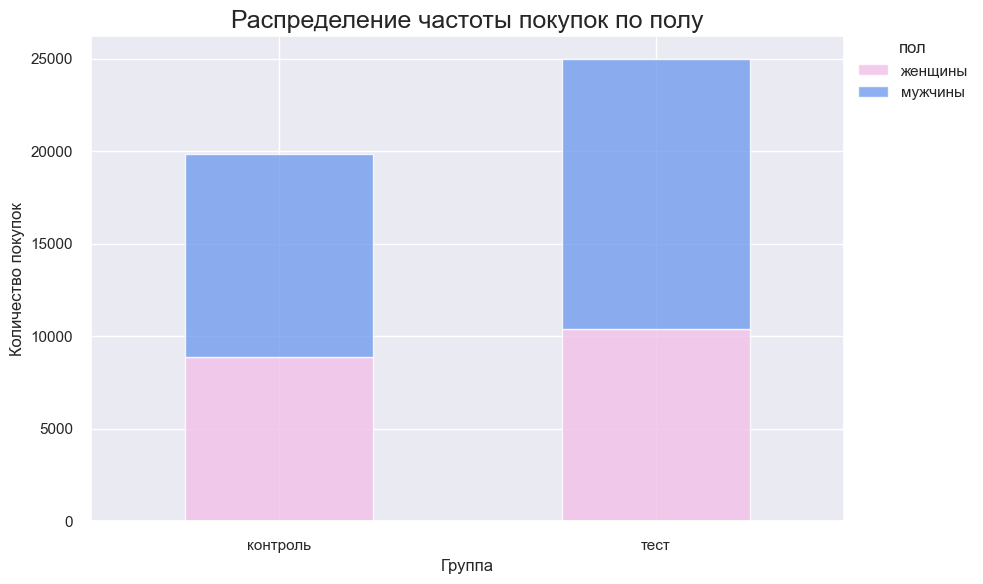

In [210]:
sns.set()
count_cost_gender.plot(kind='bar',
                       stacked=True,
                       figsize=(10, 6),
                       color=['#f1c0e8', '#729dee'],
                       alpha=0.8)
plt.title('Распределение частоты покупок по полу', fontsize=18)
plt.xlabel('Группа', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.legend(title='пол', bbox_to_anchor=(1.0, 1.018))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Кол-во покупок по полу.png', dpi=800, bbox_inches='tight')  
plt.show()

<span style="color:#00b7eb;
             font-weight:bold;
             font-size:20px;
             text-shadow: 3px 3px 5px #c4c3d0;">Частота покупок по возрасту.</span>

In [211]:
frequency_group = pd.pivot_table(sale,
                                values='cost',
                                index='AB',
                                columns='age_group',
                                aggfunc='count',
                                observed=False)
print("ЧАСТОТА ПОКУПОК ПО ВОЗРАСТНЫМ ГРУППАМ:")
frequency_group

ЧАСТОТА ПОКУПОК ПО ВОЗРАСТНЫМ ГРУППАМ:


age_group,Дети (до 18),Молодёжь(19-30),Взрослые(31-45),Старшее поколение(46-60),Пенсионеры(>60)
AB,,,,,
0,1192,3529,9600,4648,893
1,1336,4794,11756,6024,1061


In [212]:
# Анализ изменений по возрастным группам
abs_age_freq = frequency_group.iloc[1] - frequency_group.iloc[0]
percent_age_freq = (frequency_group.iloc[1] - frequency_group.iloc[0]) / frequency_group.iloc[0] * 100

print("ИЗМЕНЕНИЯ ЧАСТОТЫ ПОКУПОК ПО ВОЗРАСТУ:")
print("=" * 50)
for age_group in percent_age_freq.sort_values(ascending=False).index:
    pct = percent_age_freq[age_group]
    abs_val = abs_age_freq[age_group]
    direction = "↑" if pct > 0 else "↓"
    print(f"{age_group:<25} {direction} {abs(pct):.1f}% ({abs_val:+,} покупок)")

print(f"СРЕДНИЙ РОСТ ПО ВОЗРАСТНЫМ ГРУППАМ: {percent_age_freq.mean():.1f}%")

ИЗМЕНЕНИЯ ЧАСТОТЫ ПОКУПОК ПО ВОЗРАСТУ:
Молодёжь(19-30)           ↑ 35.8% (+1,265 покупок)
Старшее поколение(46-60)  ↑ 29.6% (+1,376 покупок)
Взрослые(31-45)           ↑ 22.5% (+2,156 покупок)
Пенсионеры(>60)           ↑ 18.8% (+168 покупок)
Дети (до 18)              ↑ 12.1% (+144 покупок)
СРЕДНИЙ РОСТ ПО ВОЗРАСТНЫМ ГРУППАМ: 23.8%


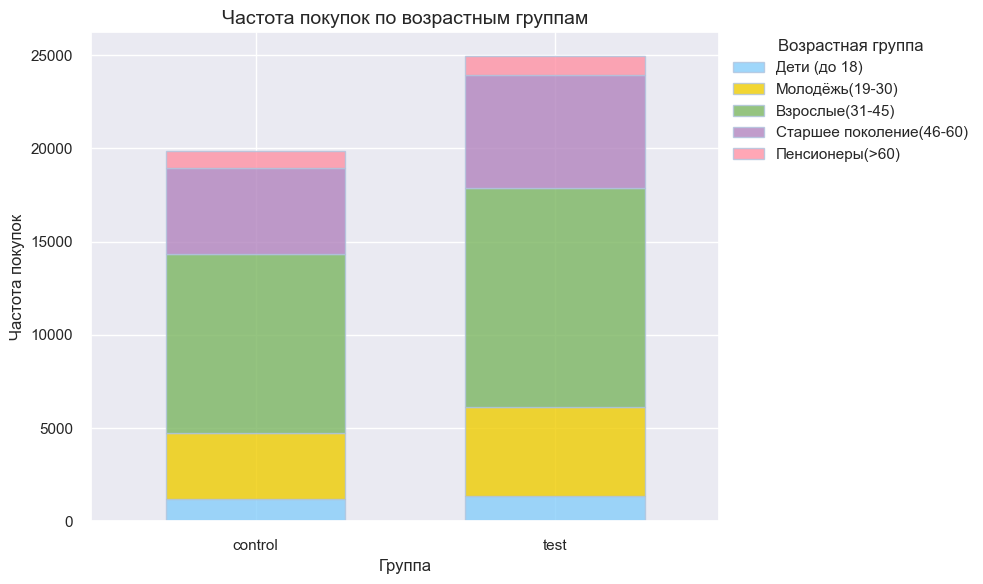

In [213]:
frequency_group.index = frequency_group.index.map({0: 'control', 1: 'test'})
sns.set()
frequency_group.plot(kind='bar', stacked=True, figsize=(10, 6), 
                 color=['#87cefa', '#efcc00', '#7bb661', '#b284be', '#ff91a4'],
                 alpha=0.8,
                 width=0.6,
                 edgecolor='#b0c4de', )
plt.title('Частота покупок по возрастным группам', fontsize=14)
plt.xlabel('Группа', fontsize=12)
plt.ylabel('Частота покупок', fontsize=12)
plt.legend(title='Возрастная группа', 
          bbox_to_anchor=(1.0, 1.015))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Кол-во покупок по возрасту.png', dpi=800, bbox_inches='tight')  
plt.show()

✅ Основной вклад в увеличение частоты покупок внесли мужчины от 19 до 60 лет, покупающие одежду.

## 10 Выручка в разрезе дней

### ⚠️ ОГРАНИЧЕНИЯ:
   • Анализ основан на 12 днях наблюдений\
   • Для статистических выводов требуется большая выборка

In [214]:
daily_revenue_test = test.groupby('dt')['cost'].sum()
daily_revenue_control = control.groupby('dt')['cost'].sum()

In [215]:
revenue_day = pd.DataFrame({'тест': [daily_revenue_test.mean(), 
                             daily_revenue_test.median()],
                    'контроль': [daily_revenue_control.mean(),
                                daily_revenue_control.median()]},
            index=['среднее', 'медиана']).round(2)
revenue_day

,тест,контроль
среднее,11040781.25,9243943.42
медиана,11076200.00,5770459.00


In [216]:
print(f"НАБЛЮДАЕМАЯ РАЗНИЦА СРЕДНЕЙ ВЫРУЧКИ В ДЕНЬ:")
print('='*50)
print(f"• {'Тестовая группа:':<25} {revenue_day.iloc[0, 0]:,.0f} руб/день.")
print(f"• {'Контрольная группа:':<25} {revenue_day.iloc[0, 1]:,.0f} руб/день.")
print(f"• {'Абсолютная разница:':<25} {(revenue_day.iloc[0, 0] - revenue_day.iloc[0, 1]):+,.0f} руб/день.")
print(f"• {'Относительная разница:':<25} {((revenue_day.iloc[0, 0] - revenue_day.iloc[0, 1]) / revenue_day.iloc[0, 1] * 100):+.1f}%")

НАБЛЮДАЕМАЯ РАЗНИЦА СРЕДНЕЙ ВЫРУЧКИ В ДЕНЬ:
• Тестовая группа:          11,040,781 руб/день.
• Контрольная группа:       9,243,943 руб/день.
• Абсолютная разница:       +1,796,838 руб/день.
• Относительная разница:    +19.4%


## 11 Количество покупок в день

### ⚠️ ОГРАНИЧЕНИЯ:
   • Анализ основан на 12 днях наблюдений\
   • Для статистических выводов требуется большая выборка

In [217]:
frequency_daily_test = test.groupby('dt')['cost'].count()
frequency_daily_control = control.groupby('dt')['cost'].count()

In [218]:
# Расчет описательных статистик
freq_day = pd.DataFrame({
    'тест': [frequency_daily_test.mean(), frequency_daily_test.median()],
    'контроль': [frequency_daily_control.mean(), frequency_daily_control.median()]
}, index=['среднее', 'медиана']).round(2)

freq_day

,тест,контроль
среднее,2080.92,1655.17
медиана,2059.00,1031.00


In [219]:
# Расчет относительной разницы
percent_freq_day = (freq_day.loc['среднее', 'тест'] - freq_day.loc['среднее', 'контроль']) / freq_day.loc['среднее', 'контроль'] * 100
abs_freq_day = freq_day.loc['среднее', 'тест'] - freq_day.loc['среднее', 'контроль']

In [220]:
print(f"НАБЛЮДАЕМАЯ РАЗНИЦА СРЕДНЕГО ЧИСЛА ПОКУПОК В ДЕНЬ:")
print('='*50)
print(f"• {'Тестовая группа:':<25} {freq_day.iloc[0, 0]:,.0f} покупок/день.")
print(f"• {'Контрольная группа:':<25} {freq_day.iloc[0, 1]:,.0f} покупок/день.")
print(f"• {'Абсолютная разница:':<25} {(freq_day.iloc[0, 0] - freq_day.iloc[0, 1]):+,.0f} покупок/день.")
print(f"• {'Относительная разница:':<25} {((freq_day.iloc[0, 0] - freq_day.iloc[0, 1]) / freq_day.iloc[0, 1] * 100):+.1f}%")

НАБЛЮДАЕМАЯ РАЗНИЦА СРЕДНЕГО ЧИСЛА ПОКУПОК В ДЕНЬ:
• Тестовая группа:          2,081 покупок/день.
• Контрольная группа:       1,655 покупок/день.
• Абсолютная разница:       +426 покупок/день.
• Относительная разница:    +25.7%


✅Средняя выручка в день в тестовой группе в период проведения кампании выше на +19.4% (+1,796,838 руб/день), средняя частота покупок в день выше на +25.7% (+426 покупок/день), чем в контрольной группе.

<span style="color:#00b2ca;
             font-weight:bold;
             font-size:30px;
             text-shadow: 3px 3px 5px #c4c3d0;">Выручка, число покупок в разрезе дней (визуализация).</span>

In [221]:
# добавление колонки AB для тестовой и контрольной групп
AB_temp = AB_test.copy()
AB_temp['AB'] = np.where(AB_temp['id'].isin(positive), 1, 0)
AB_temp['AB'] = AB_temp['AB'].astype('int8')
print(AB_temp.shape)
AB_temp.head()

(119023, 14)


,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group,AB
104,23,1,44,среднее,1178,Лиф женский Joss,синий,1399,0.0,1,58,0.4304,Одежда,0
105,23,1,44,среднее,1178,Лиф женский Joss,розовый,649,0.0,1,16,0.4304,Одежда,0
106,23,1,44,среднее,1178,Шорты женские Demix,черный,1999,0.0,0,16,0.4304,Одежда,0
285,67,1,38,среднее,1168,Фонарь кемпинговый Outventure,белый,499,1.0,0,9,0.4304,Активный отдых и спортинвентарь,1
286,67,1,38,среднее,1168,Матрас надувной Intex 193х127х24 см,мультиколор,3869,1.0,1,22,0.4304,Активный отдых и спортинвентарь,1


In [222]:
temp_test = AB_temp[AB_temp['AB'] == 1] # тест
temp_control = AB_temp[AB_temp['AB'] == 0] # контроль

In [223]:
purchase_daily_control = temp_control.groupby('dt')['cost'].sum()
purchase_daily_test = temp_test.groupby('dt')['cost'].sum()

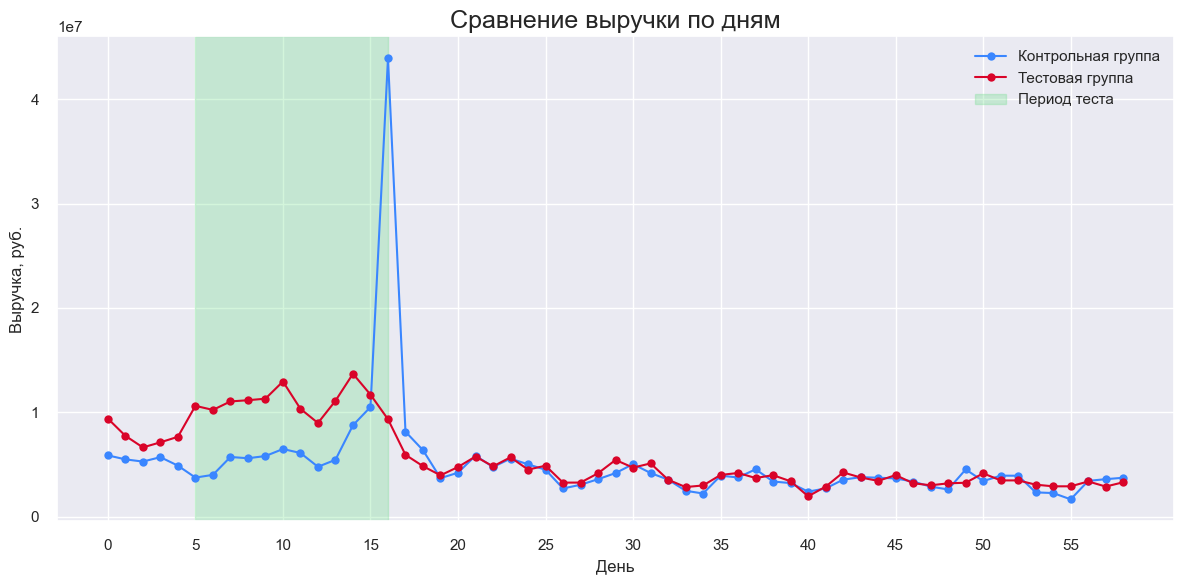

In [224]:
sns.set()
plt.figure(figsize=(12, 6))

plt.plot(
    purchase_daily_control.index, 
    purchase_daily_control.values, 
    marker='o', 
    linestyle='-',
    color='#3a86ff',
    label='Контрольная группа' 
)

plt.plot(
    purchase_daily_test.index, 
    purchase_daily_test.values, 
    marker='o', 
    linestyle='-',
    color='#d90429',
    label='Тестовая группа'
)
plt.axvspan(5, 16, color='#6ede8a', alpha=0.3, label='Период теста')

plt.title('Сравнение выручки по дням', fontsize=18)
plt.xlabel('День')
plt.ylabel('Выручка, руб.')

xticks_positions = range(0, 59, 5)
plt.xticks(xticks_positions, [str(x) for x in xticks_positions], rotation=0)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Выручка по дням.png', dpi=800, bbox_inches='tight')  
plt.show()

In [225]:
frequency_control = temp_control.groupby('dt')['cost'].count()
frequency_test = temp_test.groupby('dt')['cost'].count()

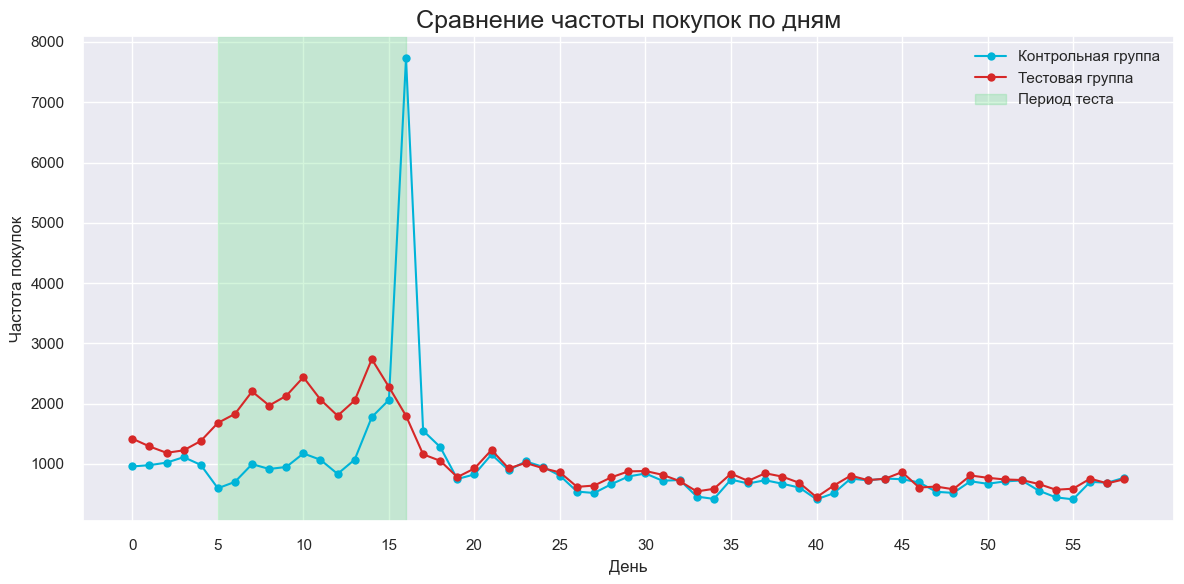

In [226]:
sns.set()
plt.figure(figsize=(12, 6))

plt.plot(
    frequency_control.index, 
    frequency_control.values, 
    marker='o', 
    linestyle='-',
    color='#00b4d8',
    label='Контрольная группа' 
)

plt.plot(
    frequency_test.index, 
    frequency_test.values, 
    marker='o', 
    linestyle='-',
    color='#d62828',
    label='Тестовая группа'
)
plt.axvspan(5, 16, color='#6ede8a', alpha=0.3, label='Период теста')

plt.title('Сравнение частоты покупок по дням', fontsize=18)
plt.xlabel('День')
plt.ylabel('Частота покупок')

xticks_positions = range(0, 59, 5)
plt.xticks(xticks_positions, [str(x) for x in xticks_positions], rotation=0)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Частота покупок по дням.png', dpi=800, bbox_inches='tight')  
plt.show()

## 13 Доля клиентов с повторными покупками

Оценка долгосрочного эффекта маркетинговой кампании на лояльность клиентов путем анализа повторных покупок после завершения кампании.

In [227]:
# Доля клиентов с повторными покупками
temp_test_filtered = temp_test[temp_test['dt'] > 17].groupby('id').filter(
    lambda x: len(x) > 1)['id'].nunique()
temp_control_filtered = temp_control[temp_control['dt'] > 17].groupby('id').filter(
    lambda x: len(x) > 1)['id'].nunique()

# Общее количество клиентов, совершивших покупки во время кампании
n_test = test['id'].nunique()
n_control = control['id'].nunique()

# Расчет долей
repeat_test = temp_test_filtered / n_test
repeat_control = temp_control_filtered / n_control

# Расчет абсолютной и относительной разницы
abs_diff = temp_test_filtered - temp_control_filtered
rel_diff = (repeat_test - repeat_control) * 100

print("РЕЗУЛЬТАТЫ АНАЛИЗА ПОВТОРНЫХ ПОКУПОК:")
print("=" * 45)
print(f"📊 Тестовая группа:  {repeat_test:.2%} ({temp_test_filtered:,} из {n_test:,} клиентов)")
print(f"📊 Контрольная группа: {repeat_control:.2%} ({temp_control_filtered:,} из {n_control:,} клиентов)")
print(f"📈 Сравнительный анализ:")
print(f"   Абсолютная разница: {abs_diff:+,} клиентов")
print(f"   Относительная разница: {rel_diff:+.2f}%")

РЕЗУЛЬТАТЫ АНАЛИЗА ПОВТОРНЫХ ПОКУПОК:
📊 Тестовая группа:  74.75% (3,561 из 4,764 клиентов)
📊 Контрольная группа: 71.30% (3,525 из 4,944 клиентов)
📈 Сравнительный анализ:
   Абсолютная разница: +36 клиентов
   Относительная разница: +3.45%


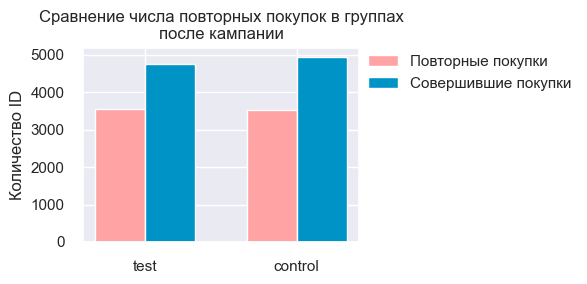

In [228]:
labels = ['test', 'control']
filtered = [temp_test_filtered, temp_control_filtered]  
total = [n_test, n_control]    

x = range(len(labels))
bar_width = 0.33

fig, ax = plt.subplots(figsize=(6, 3))
bar1 = ax.bar([i - bar_width/2 for i in x], filtered, bar_width, label='Повторные покупки', color='#ffa3a5')
bar2 = ax.bar([i + bar_width/2 for i in x], total, bar_width, label='Совершившие покупки', color='#0094c6')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Количество ID')
ax.set_title('Сравнение числа повторных покупок в группах\nпосле кампании')
ax.legend(bbox_to_anchor=(0.98, 1.033))
plt.tight_layout()
plt.savefig('Покупки после кампании.png', dpi=800, bbox_inches='tight')  
plt.show()

### 📊 Статистическая проверка значимости

In [229]:
# Подготовка данных для z-теста
successes = [temp_test_filtered, temp_control_filtered]
n_nobs = [n_test, n_control]
# Двусторонний z-тест для пропорций
z_stat, p_value = proportions_ztest(successes, n_nobs, alternative='two-sided')
print("СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ")
print("=" * 40)
print(f"📊 Результаты z-теста:")
print(f"   Z-статистика: {z_stat:.3f}")
print(f"   p-value: {p_value:.6f}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print(f"📈 Статистически значимые различия (p < {alpha})")
    if repeat_test > repeat_control:
        print(f"✅ Тестовая группа имеет ЗНАЧИМО бóльшую долю лояльных клиентов")
    else:
        print(f"❌ Контрольная группа имеет ЗНАЧИМО бóльшую долю лояльных клиентов")
else:
    print(f"✅ Нет статистически значимых различий (p ≥ {alpha})")
    print(f"➡️ Доли повторных покупок в группах статистически равны")

СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ
📊 Результаты z-теста:
   Z-статистика: 3.827
   p-value: 0.000130
📈 Статистически значимые различия (p < 0.05)
✅ Тестовая группа имеет ЗНАЧИМО бóльшую долю лояльных клиентов


### ✅ Вывод:

__Метрика__: Доля клиентов с повторными покупками\
__Результат__: ✔️ Положительный эффект\
__Размер эффекта__: +3.45% (статистически значимый)

## Вывод и рекомендации

1. Конверсия в покупку в тестовой группе ниже на 3.67%, чем в контрольной. Это означает, что рассылка скидок не мотивировала новых клиентов совершать покупки.
2. Выручка увеличилась - кампания положительно повлияла на общую доходность клиента в основном за счет покупки мужчинами старше 19 лет товаров категорий "Одежда", "Обувь, ", "Активный отдых и спортинвентарь".
3. Средний чек снизился - кампания стимулировала покупку более дешёвых товаров или клиенты использовали скидку для минимизации затрат.  
6. Количество покупок выросло - кампания стимулировала повторные покупки, укрепила лояльность клиентов, это создает потенциал для увеличения общей выручки.
7. Выручка и количество покупок в день в тестовой группе выше, при этом средний чек в день не изменился – это подтверждает, что скидки увеличили частоту покупок, но не их размер.
8. Кампания способствовала увеличению доли клиентов с повторными покупками, что указывает на положительное влияние на лояльность.

Рекомендация: \
Так как кампания имела успех в увеличении выручки и частоты покупок, сохранить персонализированные скидки для целевой аудитории (мужчины 18–60 лет, покупающие одежду, обувь).\
Так как средний чек снизился, мотивировать клиентов оформлять покупку более дорогоих товаров: скидка, бесплатная доставка или подарок при покупке от определенной суммы; внедрять кросс-продажи, продажи комплектных товаров.\
Чтобы повысить конверсию в покупку, добавить дополнительные стимулы: бесплатная доставка, подарок за первую покупку, ограниченное время действия скидки.

# Блок 3 Кластерный анализ методом KPrototypes

В работе проведён кластерный анализ клиентских данных с использованием метода KPrototypes для смешанных признаков. Достигнута сегментация аудитории по демографии, предпочтениям, чеку, особенностям покупок в акции.

## Описание данных для кластеризации

Имеется датасет по покупателям: демография, детализация покупки, город, категория товара, временные признаки, скидки.

**Кратко о признаках:**
- `id` — уникальный id клиента
- `gender` — пол (0 = ж, 1 = м)
- `age` — возраст
- `education`, `city`, `product`, `colour` — категориальные признаки
- `cost` — сумма покупки
- `product_sex`, `product_group` — товарные характеристики
- `base_sale` — куплено со скидкой или нет
- `dt` — номер дня (int)
- `personal_coef` — индивидуальный коэффициент скидки

## Предобработка и генерация признаков

- Сэмплируем 100 000 записей для ускорения кластеризации.
- Создаём признак «неделя акции», делим по бинам по dt.
- Типы приводим к нужным для корректной работы алгоритма.
- Оставляем только ключевые признаки для кластеризации.

In [557]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:1267px !important; }</style>"))

In [558]:
# Создаем копию данных и берем случайную выборку для оптимизации вычислений
cluster_df = clean_df.copy()
n = 100000
cluster_df_pr1 = cluster_df.sample(n = n, random_state = 42)

In [559]:
# Проверяем размер, типы, отсутствие пропусков
cluster_df_pr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 179655 to 172556
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100000 non-null  int64  
 1   gender         100000 non-null  int32  
 2   age            100000 non-null  int64  
 3   education      100000 non-null  object 
 4   city           100000 non-null  int64  
 5   product        100000 non-null  object 
 6   colour         100000 non-null  object 
 7   cost           100000 non-null  int64  
 8   product_sex    100000 non-null  float64
 9   base_sale      100000 non-null  int64  
 10  dt             100000 non-null  int64  
 11  personal_coef  100000 non-null  float64
 12  product_group  100000 non-null  object 
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 10.3+ MB


In [560]:
# Биннинг по неделям маркетинговой кампании (0-8 неделя)
cluster_df_pr1['week'] = pd.cut(
    cluster_df_pr1['dt'],
    bins=[-1, 7, 14, 21, 28, 35, 42, 49, 56, 63],
    labels=list(range(9))
).astype('object')

In [561]:
# Приводим типы некоторых признаков к целым числам
cluster_df_pr1[['gender', 'base_sale']] = cluster_df_pr1[['gender', 'base_sale']].astype('int')

In [562]:
# Отбор релевантных признаков для кластеризации
cluster_df_pr = cluster_df_pr1.drop([
    'id', 'product', 'city', 'product_sex', 'dt', 'education', 'colour', 'personal_coef'], axis=1)

In [581]:
display(cluster_df_pr.info())
display(cluster_df_pr.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         100000 non-null  int32 
 1   age            100000 non-null  int64 
 2   cost           100000 non-null  int64 
 3   base_sale      100000 non-null  int32 
 4   product_group  100000 non-null  object
 5   week           100000 non-null  object
 6   KPrototypes    100000 non-null  uint16
dtypes: int32(2), int64(2), object(2), uint16(1)
memory usage: 4.0+ MB


None

,gender,age,cost,base_sale,product_group,week,KPrototypes
0,1,54,4299,0,Одежда,1,4
1,0,47,4799,0,Обувь,0,0
2,1,53,1299,0,Одежда,3,4
3,1,38,1299,0,Транспорт и водные виды,6,4
4,1,28,3099,1,Одежда,1,2


### 📊 Статистика признаков

In [565]:
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:")
print("=" * 50)
numeric_stats = cluster_df_pr.select_dtypes(include=['number']).describe()
numeric_stats

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:


,gender,age,cost,base_sale
count,100000.000000,100000.000000,100000.00000,100000.00000
mean,0.556780,38.412370,5407.98626,0.35465
std,0.496768,12.147018,10316.48793,0.47841
min,0.000000,5.000000,12.00000,0.00000
25%,0.000000,31.000000,1499.00000,0.00000
50%,1.000000,38.000000,2999.00000,0.00000
75%,1.000000,46.000000,5599.00000,1.00000
max,1.000000,77.000000,446420.00000,1.00000


In [566]:
print("СТАТИСТИКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:")
print("=" * 45)
categorical_stats = cluster_df_pr.select_dtypes(include=['object']).describe()
categorical_stats

СТАТИСТИКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:


,product_group,week
count,100000,100000
unique,4,9
top,Одежда,0
freq,44273,18285


## Масштабирование и подготовка к кластеризации

Для KPrototypes числовые признаки стандартизируем, категориальные оставляем без изменений. Далее объединяем их обратно.

In [567]:
# Категориальные и числовые признаки, раздельно для подготовки
categorical_cols = cluster_df_pr.select_dtypes(exclude=['number']).columns
numeric_cols = cluster_df_pr.select_dtypes(include=['number']).columns

In [568]:
print("РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ:")
print(f"Числовые признаки: {list(numeric_cols)}")
print(f"Категориальные признаки: {list(categorical_cols)}")

РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ:
Числовые признаки: ['gender', 'age', 'cost', 'base_sale']
Категориальные признаки: ['product_group', 'week']


In [569]:
# Стандартизация числовых признаков
scaler = StandardScaler()
scaled_num = scaler.fit_transform(cluster_df_pr[numeric_cols])
df_st_num = pd.DataFrame(scaled_num, columns=numeric_cols)

In [571]:
# Объединяем обратно числовые и категориальные признаки
cluster_df_pr.reset_index(drop=True, inplace=True)
df_st_num.reset_index(drop=True, inplace=True)
df_st_all = pd.concat([df_st_num, cluster_df_pr[categorical_cols]], axis=1)

In [587]:
# Индексы категориальных колонок — для передачи алгоритму
categorical_indices = [df_st_all.columns.get_loc(col) for col in categorical_cols]
print('Индексы категориальных:', categorical_indices)

Индексы категориальных: [4, 5]


## Подбор числа кластеров метод локтя и силуэт

Методы локтя и силуэтного коэффициента используются для выбора оптимального числа кластеров. Визуализируем результат для принятия решения.

In [724]:
# Поиск оптимального числа кластеров методами локтя и силуэтного коэффициента.
cluster_range = range(2, 16) 
costs = []
silhouette_scores_kproto = []

for k in cluster_range:
    kproto = KPrototypes(n_clusters=k,
                         init='Cao',
                         verbose=0,
                         gamma=0.03,
                         n_init=5, 
                        max_iter=50)
    clusters = kproto.fit_predict(df_st_all, categorical=categorical_indices)
    costs.append(kproto.cost_)
    silhouette_scores_kproto.append(silhouette_score(df_st_num.values, clusters))

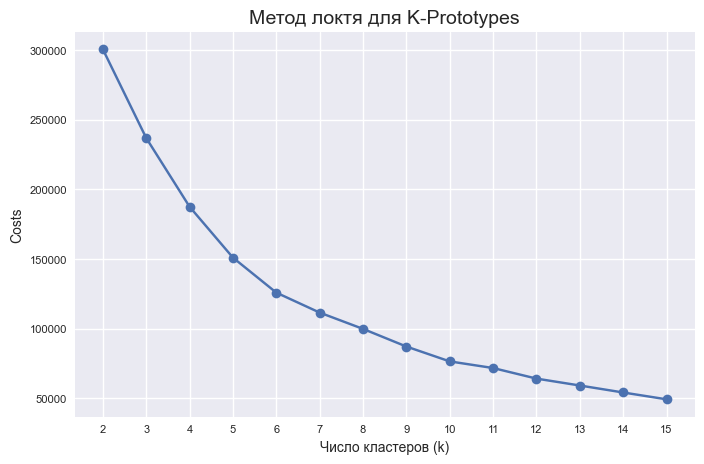

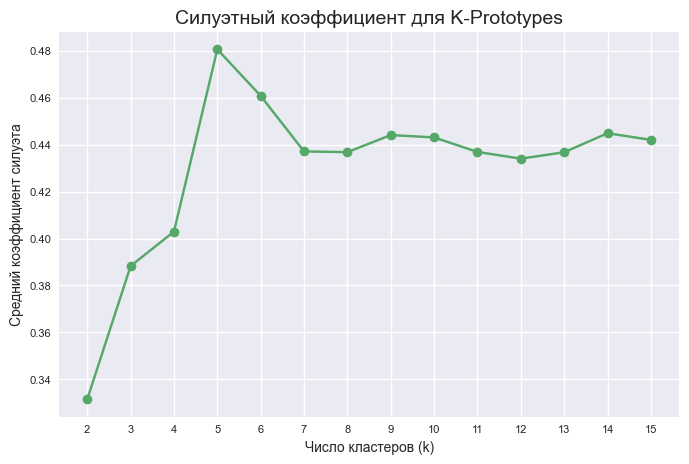

In [575]:
# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, costs, 'bo-')
plt.tick_params(axis='both',
                labelsize=8,
                length=4,
                width=1,
                pad=1.5)
plt.xlabel('Число кластеров (k)', fontsize=10)
plt.ylabel('Costs', fontsize=10)
plt.title('Метод локтя для K-Prototypes', fontsize=14)
plt.xticks(cluster_range)
plt.grid(True)
plt.savefig('ЛокотьСилуэт1.png', dpi=800, bbox_inches='tight')  
plt.show()

# Визуализация силуэтных коэффициентов
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores_kproto, 'go-')
plt.tick_params(axis='both',
                labelsize=8,
                length=4,
                width=1,
                pad=1.5)
plt.xlabel('Число кластеров (k)', fontsize=10)
plt.ylabel('Средний коэффициент силуэта', fontsize=10)
plt.title('Силуэтный коэффициент для K-Prototypes', fontsize=14)
plt.xticks(cluster_range)
plt.grid(True)
plt.savefig('ЛокотьСилуэт2.png', dpi=800, bbox_inches='tight')  
plt.show()

## Построение модели KPrototypes

Выбираем итоговое число кластеров.

In [590]:
n_clusters = 5
kproto = KPrototypes(n_clusters=n_clusters,
                         init='Cao',
                         n_init=20,
                         gamma=0.03,
                         max_iter=50,
                         verbose=0)
clusters = kproto.fit_predict(df_st_all, categorical=categorical_indices)
cluster_df_pr['KPrototypes'] = clusters

## Визуализация и анализ кластеров

1. Двумерное сжатие числовых признаков через t-SNE и раскраска кластеров.
2. Медианные значения по признакам для каждого кластера.
3. Круговая диаграмма распределения по кластерам.

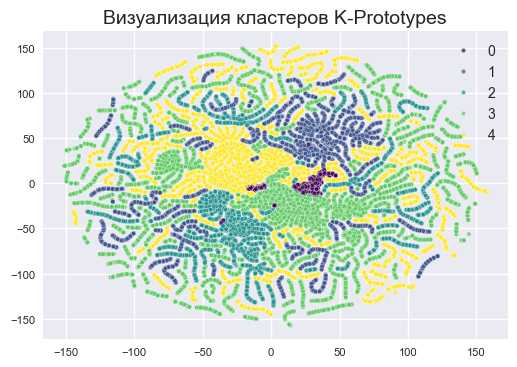

In [591]:
tsne_kproto = TSNE(n_components=2, random_state=42, init='random')
tsne_results_kproto = tsne_kproto.fit_transform(df_st_num)
plt.figure(figsize=(6, 4))
plt.tick_params(axis='both',
                labelsize=8,
                length=4,
                width=1,
                pad=1.5)
sns.scatterplot(
    x=tsne_results_kproto[:, 0], y=tsne_results_kproto[:, 1],
    hue=clusters,
    palette='viridis',
    s=10,
    alpha=0.7
)
plt.legend(loc='upper right')
plt.title('Визуализация кластеров K-Prototypes', fontsize=14)
plt.savefig('ProtoSNE.png', dpi=800, bbox_inches='tight')  
plt.show()

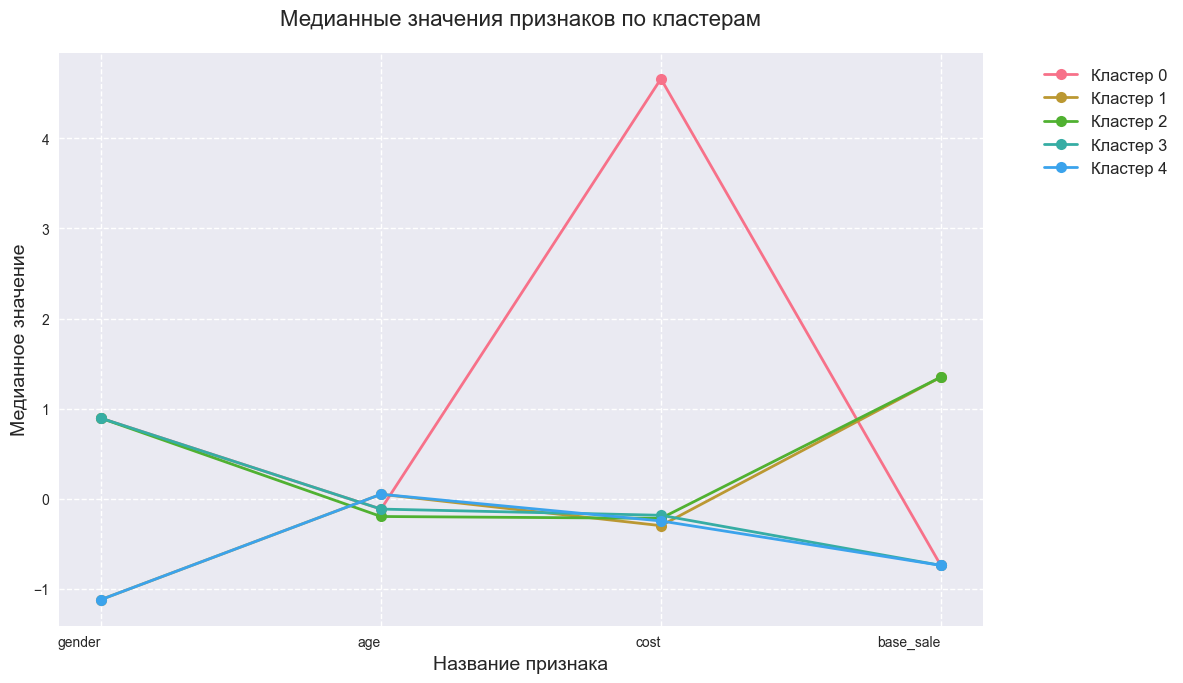

In [595]:
# Преобразование DataFrame в NumPy массив (только числовые столбцы)
numeric_cols = df_st_all.select_dtypes(include=[np.number]).columns
kproto_df_encoded_numeric = df_st_all[numeric_cols].to_numpy()

plt.figure(figsize=(12, 7))  

# Диаграмма медианных значений по кластерам
for cluster_id in range(n_clusters):
    cluster_data = kproto_df_encoded_numeric[clusters == cluster_id, :]
    median_values = np.median(cluster_data, axis=0)
    plt.plot(numeric_cols,  
             median_values, 
             marker='o',
             markersize=8,
             linewidth=2,
             label=f'Кластер {cluster_id}')

plt.xticks(rotation=0, ha='right')  
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--')
plt.xlabel("Название признака", fontsize=14)
plt.ylabel("Медианное значение", fontsize=14)
plt.title("Медианные значения признаков по кластерам", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('Медианные значения признаков по кластерам.png', dpi=900, bbox_inches='tight')  
plt.show()

In [183]:
proto_stats = cluster_df_pr.groupby('KPrototypes').size().reset_index(name='count')
proto_stats

,KPrototypes,count
0,0,17955
1,1,1507
2,2,17407
3,3,37041
4,4,26090


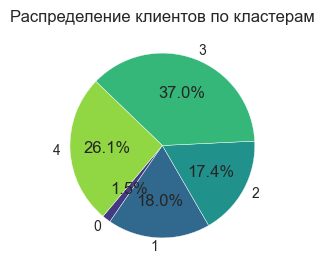

In [596]:
# Круговая диаграмма — распределение клиентов по кластерам
proto_stats = cluster_df_pr.groupby('KPrototypes').size().reset_index(name='count')
plt.figure(figsize=(3, 3))
plt.pie(proto_stats['count'], 
        labels=proto_stats['KPrototypes'], 
        autopct='%1.1f%%',
        startangle=230,
        colors=sns.color_palette("viridis", n_colors=n_clusters))
plt.title('Распределение клиентов по кластерам')
plt.savefig('Кол-во клиентов по кластерам.png', dpi=900, bbox_inches='tight')  
plt.show()

## Анализ характеристик кластеров

- Средние числовые показатели для каждого кластера
- Мода по категориальным переменным
- Кросс-таблицы по ключевым признакам (пол, скидка, неделя, категория)

In [611]:
# Таблица, объединяющая числовую и категориальную статистику по кластерам
proto_num = cluster_df_pr.groupby('KPrototypes').mean(numeric_only=True).round(2)
proto_categorical = cluster_df_pr.groupby('KPrototypes')[
    cluster_df_pr.select_dtypes(include=['object', 'category']).columns
].agg(lambda x: x.mode()[0])
KPrototypes_df = pd.concat([proto_num, proto_categorical], axis=1)
KPrototypes_df

,gender,age,cost,base_sale,product_group,week
KPrototypes,,,,,,
0,0.82,37.41,65749.62,0.07,Транспорт и водные виды,0
1,0.00,40.00,3036.64,1.00,Одежда,1
2,1.00,36.73,4148.59,1.00,Одежда,1
3,1.00,37.41,5454.27,0.00,Одежда,0
4,0.00,39.93,4326.70,0.00,Одежда,0


In [627]:
# распределение пола по кластерам
gender_normalized = (
    pd.crosstab(cluster_df_pr['gender'], cluster_df_pr['KPrototypes'])
    .div(proto_stats['count'], axis=1).T * 100
).round(2)
gender_normalized

gender,0,1
KPrototypes,,
0,18.44,81.56
1,100.00,0.00
2,0.00,100.00
3,0.00,100.00
4,100.00,0.00


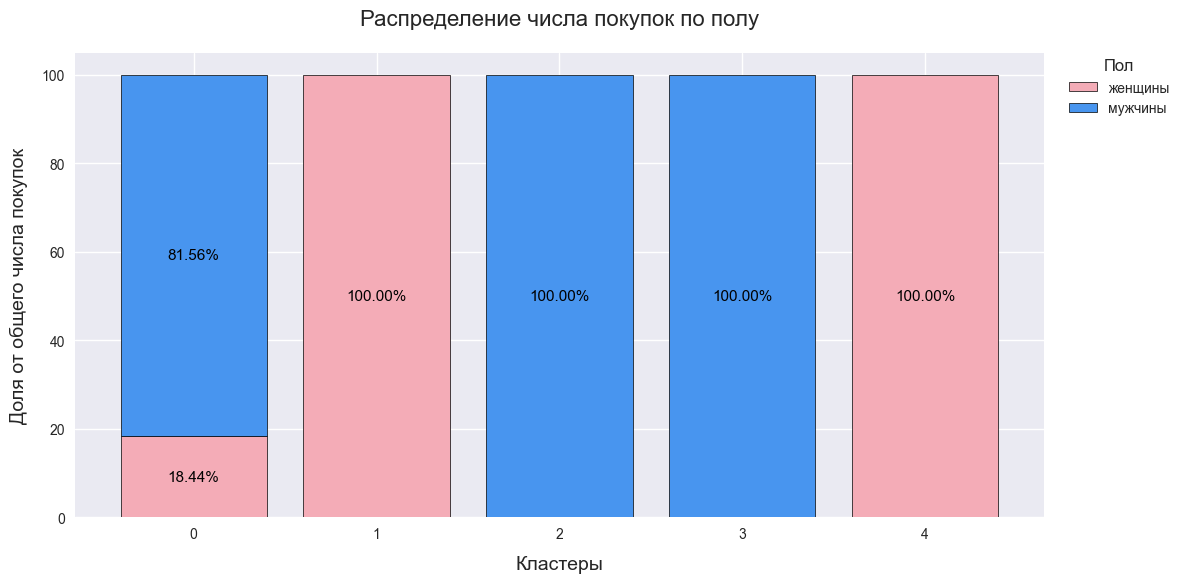

In [728]:
gender_normalized = gender_normalized.rename(columns={0.0: 'женщины', 1.0: 'мужчины'})

plt.figure(figsize=(12, 6))
palette = ['#f4acb7', '#4895ef']
gender_normalized.plot(
    kind='bar', 
    stacked=True,
    ax=plt.gca(),
    edgecolor='black',
    linewidth=0.5,
    width=0.8,
    color=palette
)
plt.gca()
plt.title('Распределение числа покупок по полу', fontsize=16, pad=20)
plt.xlabel('Кластеры',fontsize=14, labelpad=10)
plt.ylabel('Доля от общего числа покупок', fontsize=14, labelpad=10)

plt.legend(
    title='Пол',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.xticks(rotation=0)  

for patch in plt.gca().patches:
    width, height = patch.get_width(), patch.get_height()
    if height > 0:
        plt.text(
            patch.get_x() + width / 2,
            patch.get_y() + height / 2,
            f'{height:.2f}%',
            ha='center',
            va='center',
            fontsize=11,
            color='black'
        )

plt.tight_layout()
plt.savefig('Число покупок по полу.png', dpi=800, bbox_inches='tight')  
plt.show()

In [726]:
# распределение покупателей товаров со скидкой и без по кластерам
sale_normalized = (
    pd.crosstab(cluster_df_pr['base_sale'], cluster_df_pr['KPrototypes'])
    .div(proto_stats['count'], axis=1).T * 100
).round(2)
sale_normalized

base_sale,0,1
KPrototypes,,
0,93.17,6.83
1,0.00,100.00
2,0.00,100.00
3,100.00,0.00
4,100.00,0.00


In [727]:
# распределение числа покупок по неделям
count_week_normalized = (
    pd.crosstab(cluster_df_pr['week'], cluster_df_pr['KPrototypes'])
                   .div(proto_stats['count'], axis=1).T * 100
).round(2)
count_week_normalized

week,0,1,2,3,4,5,6,7,8
KPrototypes,,,,,,,,,
0,18.37,17.64,12.53,12.47,10.01,8.55,9.22,8.95,2.25
1,14.27,14.88,13.57,9.38,10.03,10.58,12.56,11.35,3.39
2,13.80,14.21,12.79,9.27,10.06,11.78,12.93,11.71,3.45
3,20.35,19.29,13.60,10.36,9.43,8.10,8.43,7.96,2.49
4,21.11,19.64,13.62,9.79,9.53,7.74,8.01,7.71,2.86


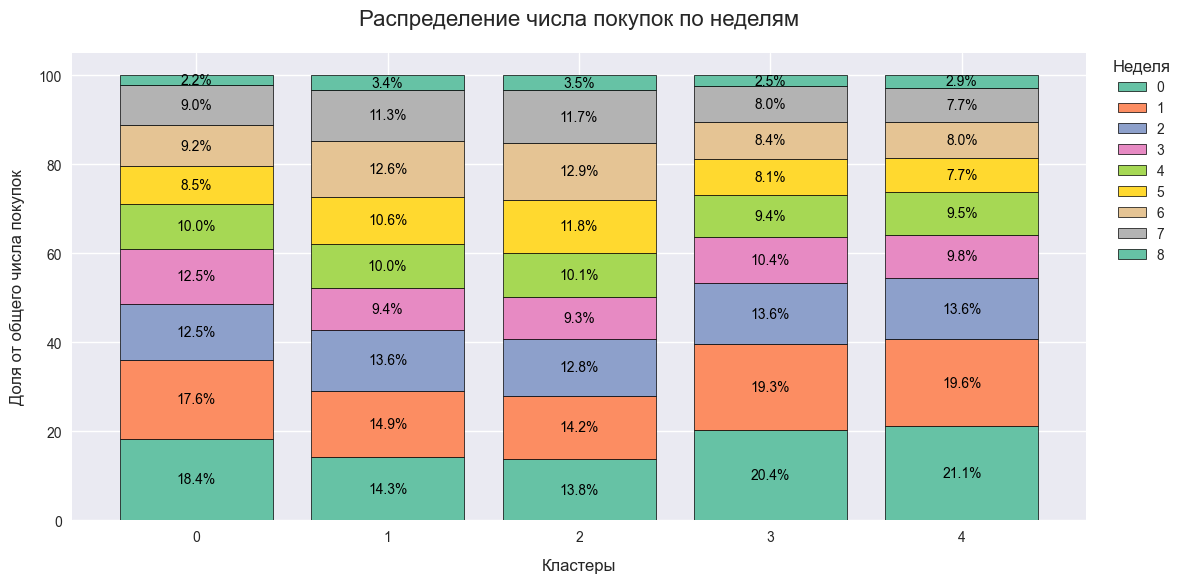

In [623]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette('Set2', n_colors=count_week_normalized.shape[1])
count_week_normalized.plot(
    kind='bar', 
    stacked=True,
    ax=plt.gca(),
    edgecolor='black',
    linewidth=0.5,
    width=0.8,
    color=palette
)
plt.gca()
plt.title('Распределение числа покупок по неделям', fontsize=16, pad=20)
plt.xlabel('Кластеры',fontsize=12, labelpad=10)
plt.ylabel('Доля от общего числа покупок', fontsize=12, labelpad=10)

plt.legend(
    title='Неделя',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.xticks(rotation=0)  
for patch in plt.gca().patches:
    width, height = patch.get_width(), patch.get_height()
    if height > 0:
        plt.text(
            patch.get_x() + width / 2,
            patch.get_y() + height / 2,
            f'{height:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )
plt.tight_layout()
plt.savefig('CountWeek.png', dpi=900, bbox_inches='tight')  
plt.show()

In [624]:
# распределение числа покупок по товарным категориям
cross_product_normalized = (
    pd.crosstab(cluster_df_pr['product_group'], cluster_df_pr['KPrototypes'])
                   .div(proto_stats['count'], axis=1).T * 100
).round(2)
cross_product_normalized

product_group,Активный отдых и спортинвентарь,Обувь,Одежда,Транспорт и водные виды
KPrototypes,,,,
0,24.47,3.58,8.49,63.46
1,6.23,30.95,61.51,1.31
2,10.08,36.84,50.53,2.56
3,25.14,30.98,35.82,8.06
4,19.74,32.68,42.31,5.27


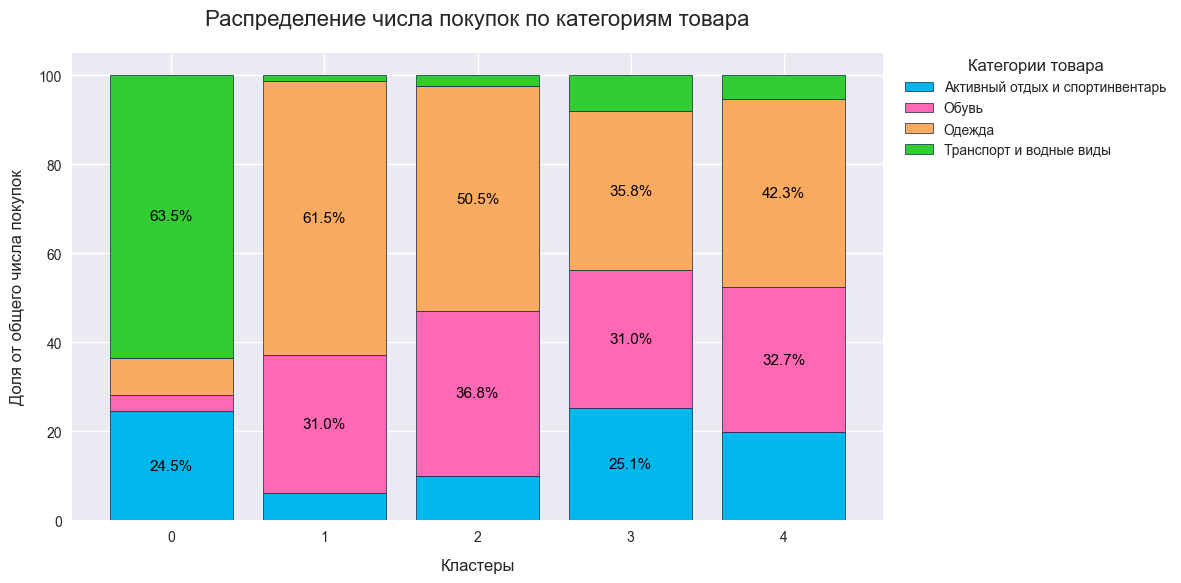

In [626]:
cross_tab_normalized = (cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100).round(2)
plt.figure(figsize=(12, 6))
palette = ['#00b7eb', '#ff69b4', '#fbab60', '#32cd32', '#ffb703', '#6a994e', '#90e0ef', '#ff8fab',
           '#ffc300', '#b23a48', '#c77dff']

cross_product_normalized.plot(
    kind='bar', 
    stacked=True,
    ax=plt.gca(),
    edgecolor='#0b2545',
    linewidth=0.5,
    width=0.8,
    color=palette
)
plt.title('Распределение числа покупок по категориям товара', fontsize=16, pad=20)
plt.xlabel('Кластеры', fontsize=12, labelpad=10)
plt.ylabel('Доля от общего числа покупок', fontsize=12, labelpad=10)

plt.legend(
    title='Категории товара',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.xticks(rotation=0) 

for patch in plt.gca().patches:
    width, height = patch.get_width(), patch.get_height()
    if height > 20:  
        plt.text(
            patch.get_x() + width / 2,
            patch.get_y() + height / 2,
            f'{height:.1f}%',
            ha='center',
            va='center',
            color='black',
            fontsize=11
        )

plt.tight_layout()
plt.savefig('Число покупок по категориям товаров.png', dpi=800, bbox_inches='tight')  
plt.show()

## Бизнес-интерпретация и рекомендации

Пик покупок в начале кампании (0-1 неделя) с тенденцией к уменьшению числа покупок со временем, поэтому рекомендовано ограничивать кампании со скидками по времени. Средний чек клиентов, покупающих со скидками ниже.

===================================================================================================================

<span style="color:#007aa5;
             font-weight:bold;
             font-size:30px;
             text-shadow: 3px 3px 3px #c4c3d0;">Кластер 0.
</span>
###  👑 **_Премиальные покупатели транспорта и товаров для водного вида спорта._**
### **_Характеристика:_**

- 1 507 клиента (1.5%)
- в основном мужчины (~82%)
- средний возраст 37 лет
- самый высокий средний чек (65 768 ₽)
- редко покупки с базовой скидкой (7%)
- 63.4% покупок — «Транспорт и товары для водных видов спорта», реже - «Активный отдых и спортинвентарь» (24.5%).
- наиболее активная неделя: 0 (18.3%), затем 1-я (17.7%).

### **_Интерпретация:_**

Небольшой, высокодоходный кластер, преимущественно мужчины, покупающие дорогие товары (транспорт, спортинвентарь) по полной цене. Потенциально — клиенты с высоким доходом, ведущие активный образ жизни.

### **_Рекомендации:_**
1. Таргетированная реклама премиальных товаров.
2. Расширить линейку премиальных товаров в категориях "Транспорт и водные виды" и "Активный отдых и спортинвентарь".
3. Допродажа - предлагать комплектующие, продукты для обслуживания оборудования, аксессуары.
4. Программы лояльности для удержания клиентов - расширенная гарантия на оборудование, индивидуальные консультации по подбору дорогостоящего оборудования, круглосуточная техническая помощь, выездное обслуживание транспорта.
5. Фокус на качество и сервис, а не цену.

===================================================================================================================

<span style="color:#007aa5;
             font-weight:bold;
             font-size:30px;
             text-shadow: 3px 3px 3px #c4c3d0;">Кластер 1.
</span>
### 🏷️ **_Ценочувствительные активные покупатели-женщины одежды и обуви._**
### **_Характеристика:_**

- 17 955 клиентов (18%)
- 100% женщины
- средний возраст ~40 лет
- средний чек ~3 037 ₽ (ниже среднего)
- все покупки с базовой скидкой
- основные покупки «Одежда» (61.5%) и «Обувь» (31%).
- пик покупок - 1-я неделя (14.9%), затем 0-я неделя (14.3%).

### **_Интерпретация:_**

Женщины среднего возраста, ориентированные на скидки при покупке одежды и обуви.

### **_Рекомендации:_**
1. Краткосрочные скидки: проводить акции на женскую одежду и обувь.
2. Кросс-продажи аксессуаров и недорогих товаров.
3. Комплектные предложения: продвигать наборы (например, футболка + обувь) во время распродаж.
4. Персонализированные уведомления о скидках женщинам для повышения вовлечённости.
5. Накопление баллов за покупку для обмена на товар, таргетированое расширение программы скидок.
6. Рассрочка или кредит без переплаты для постоянных клиентов.

===================================================================================================================

<span style="color:#007aa5;
             font-weight:bold;
             font-size:30px;
             text-shadow: 3px 3px 3px #c4c3d0;">Кластер 2.
</span>
### 💰 **_Мужчины, покупающие одежду и обувь со скидкой._**
### **_Характеристика:_**

- 17 407 клиентов (17.4%)
- 100% мужчины
- средний возраст ~37лет 
- средний чек ~4 149₽ 
- все покупки со скидкой
- основная категория — «Одежда» (50.5%), затем «Обувь» (36.8%).
- пик покупок в 0-ю неделю (14.2%), затем в 1-ю (13.8).

### **_Интерпретация:_**

Мужчины среднего возраста, покупающие одежду и обувь на распродажах.

### **_Рекомендации:_**
1. Внедрить бонусную программу с баллами за покупки, которые можно использовать для скидок на одежду и обувь.
2. Комплекстные предложения.
3. Кросс-продажи.
4. Расширить программу скидок.

===================================================================================================================

<span style="color:#007aa5;
             font-weight:bold;
             font-size:30px;
             text-shadow: 3px 3px 3px #c4c3d0;">Кластер 3.
</span>
### 👔 **_Покупатели-мужчины одежды и обуви по полной цене._**
### **_Характеристика:_**

- 37 041 клиентов (37.0%)
- 100% мужчины
- средний возраст ~37лет
- средний чек ~5 454₽ 
- все покупки без скидки
- основная категория — «Одежда» (35.8%), затем «Обувь» (31.0%) и «Активный отдых и спортинвентарь» (25.1%).
- пик покупок в 0-ю неделю (20.3%), затем во 1-ю (19.3%).

### **_Интерпретация:_**

Это самый крупный кластер, состоящий из мужчин среднего возраста, которые покупают одежду, обувь и товары для активного отдыха по полной стоимости. Это указывает на высокую платежеспособность и предпочтение качества, брендов, функциональности.

### **_Рекомендации:_**
1. Внедрить программу лояльности с бонусами за покупки без скидок, которые можно обменять на аксессуары или услуги.
2. Введение сезонных коллекций для активного отдыха.
3. Сезонные кампании: продвигать новые коллекции мужской обуви и одежды, акцентируя качество и новинки.
4. Комплектные предложения: предлагать комбинации (например, обувь + куртка).
5. Кросс-продажи: продвигать товары для активного отдыха и спортинвентарь вместе с одеждой и обувью.
6. Оформлять карты постоянного покупателя с предложениями.

===================================================================================================================

<span style="color:#007aa5;
             font-weight:bold;
             font-size:30px;
             text-shadow: 3px 3px 3px #c4c3d0;">Кластер 4.
</span>
### 👠 **_Бренд-ориентированные покупательницы одежды и обуви._**
### **_Характеристика_**
- 26 090 клиентов (26.1%)
- 100% женщины
- средний возраст ~40 лет
- средний чек ~4 328₽
- все покупки без базовой скидки
- основная категория «Одежда» (42.3%), затем «Обувь» (32.7%) и «Активный отдых и спортинвентарь» (19.7%).
- пик покупок в 0-ю неделю (21%), затем во 1-ю (20%).

### **_Интерпретация:_**

Женщины, покупающие по полной цене преимущественно одежду и обувь, вероятно, ориентированы на бренд или менее чувствительны к цене.

### **_Рекомендации:_**
1. Продвижение новинок и брендов через акцент на качество и долговечность: рекламировать новые коллекции женской одежды и обуви, оформление подписки на бренды с уведомлением о появлении новых моделей, таргетируя женщин (~40 лет).
2. Увеличение ассортимента одежды и обуви.
3. Кросс-продажи бендовых аксессуаров к одежде и обуви.

========================================================================================================================

### **Общие рекомендации:**

1. Таргетированные рекламные кампании.  

2. Для ценозависимых клиентов (Кластеры 1 и 2), реагирующих на скидки важно создать акцент на выгоде, доступности получения скидки, кэшбэка, бонусов, удобстве оплаты (рассрочка, оплата частями).

- Усиление лояльности: накопительные баллы за покупки, которые можно обменивать на скидки или подарки, персональные скидки
- Повышение среднего чека: кросс-продажи, комплектные предложения, допродажи со скидкой, ограниченные предложения
- Удержание клиентов: регулярные напоминания о выгоде(Email/SMS/Push-уведомления), кэшбэк
- Привлечение новых клиентов: бесплатный пробник или первый заказ со скидкой, розыгрыши, мастер-классы, мероприятия

3. Для нечувствительных к скидкам клиентов (Кластеры 0, 3, 4) важно: подчеркивать эксклюзивность и статус (ограниченные коллекции, VIP-доступ), делать ставку на качество и инновации (новые технологии, премиальные материалы), обеспечивать персональный сервис (консьерж-поддержка, индивидуальные подборки), создавать эмоциональную связь (мероприятия, истории бренда).

-  Усиление лояльности: персональный менеджер, ранний доступ к новинкам, приглашения на закрытые мероприятия, рекомендации на основе прошлых покупок, подбор индивидуальных комплектов.
- Повышение среднего чека: премиум-комплекты и капсульные коллекции, допродажа гаджетов, брендовых аксессуаров
- Удержание клиентов: доступ к группам/мероприятиям с экспертами, спортсменами, тренерами, бесплатный сервис и уход за товарами.
- Привлечение новых клиентов: тест-драйвы и пробные периоды, совместные акции с фитнес-клубами, спа-отелями, спортивными событиями.


# Блок 4 Прогнозирование склонности клиента к покупке обуви

## Постановка задачи
**Цель**: Разработать модель для прогнозирования склонности клиентов к покупке обуви на основе исторических данных о покупках.

**Подход**:
- **Классификатор**: Определяет, покупал ли клиент обувь (бинарная классификация)
- **Регрессор**: Предсказывает долю покупок обуви среди всех покупок клиента
- **Итоговая метрика**: Объединенный propensity score = Вероятность × Ожидаемая доля


## Загрузка и обзор данных

In [230]:
# Загрузка и обзор данных
model_df = clean_df.copy()
print(f"Размер исходного датасета: {model_df.shape}\n")
model_df.head()

Размер исходного датасета: (780117, 13)



,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group
0,0,0,36,среднее,1201,"Велосипед горный женский Stern Mira 2.0 26""",мультиколор,13599,0.0,1,7,0.5072,Транспорт и водные виды
1,0,0,36,среднее,1201,Стол Outventure,зеленый,1499,0.0,0,37,0.5072,Активный отдых и спортинвентарь
2,0,0,36,среднее,1201,Набор Outventure: стол + 4 стула,бежевый,4799,0.0,0,37,0.5072,Активный отдых и спортинвентарь
3,3,1,31,среднее,1134,Кеды мужские FILA A-Low,белый,2799,1.0,1,34,0.4304,Обувь
4,3,1,31,среднее,1134,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультиколор,7199,1.0,0,27,0.4304,Активный отдых и спортинвентарь


In [231]:
# Фильтрация данных для города 1188
model_df_1188 = model_df[(model_df['city'] == 1188) & (model_df['cost'] > 0)]
print(f"Размер датасета после фильтрации (город 1188): {model_df_1188.shape}\n")
model_df_1188.head()

Размер датасета после фильтрации (город 1188): (88888, 13)



,id,gender,age,education,city,product,colour,cost,product_sex,base_sale,dt,personal_coef,product_group
14,6,1,52,среднее,1188,Кроссовки мужские adidas Lite Racer CLN 2.0,черный,7399,1.0,0,13,0.4304,Обувь
15,6,1,52,среднее,1188,Футболка мужская Kappa Authentic Core,синий,999,1.0,0,8,0.4304,Одежда
16,6,1,52,среднее,1188,Кроссовки для мальчиков Geox J Sprintye Boy,мультиколор,4999,1.0,0,1,0.4304,Обувь
17,6,1,52,среднее,1188,Бейсболка детская Nike Futura Mash Up,синий,1119,1.0,1,11,0.4304,Одежда
18,6,1,52,среднее,1188,"Носки детские Demix, 2 пары",мультиколор,299,1.0,0,11,0.4304,Одежда


In [232]:
# Основная информация о данных
model_df_1188.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88888 entries, 14 to 780116
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             88888 non-null  int64  
 1   gender         88888 non-null  int32  
 2   age            88888 non-null  int64  
 3   education      88888 non-null  object 
 4   city           88888 non-null  int64  
 5   product        88888 non-null  object 
 6   colour         88888 non-null  object 
 7   cost           88888 non-null  int64  
 8   product_sex    88888 non-null  float64
 9   base_sale      88888 non-null  int64  
 10  dt             88888 non-null  int64  
 11  personal_coef  88888 non-null  float64
 12  product_group  88888 non-null  object 
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 9.2+ MB


## Предобработка данных и Feature Engineering

### 1 Препроцессинг под классификатор 

In [233]:
# Функции для создания признаков
def preprocess_for_classifier(df):
    """
    Parameters:
    -----------
    df : Исходный датафрейм с транзакциями
        
    Returns:
    --------
    Агрегированные данные на уровне клиента с созданными признаками
    
    """
    df = df.copy()
    
    # Фильтрация данных
    df = df[(df['city'] == 1188) & (df['cost'] > 0)]
    
    # Создание целевой переменной и новых признаков
    df['shoes'] = (df['product_group'] == 'Обувь').astype(int)
    df['education_high'] = (df['education'] == 'высшее').astype(int)
    
    # Биннинг возраста
    df['age_bin'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=list(range(5))).astype(int)
    
    # Биннинг стоимости
    df['cost_binned'] = pd.cut(df['cost'], bins=[0, 250, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
                                                 20000, 30000, 40000, 50000, 100000, 500000], labels=list(range(18))).astype(
        float)
    
    def avg_diff_days(d):
        """Рассчет среднего интервала между покупками"""
        d = sorted(d)
        if len(d) <= 1:
            return 0
        return sum([d[i+1] - d[i] for i in range(len(d)-1)]) / (len(d)-1)
    
    # Агрегация на уровне клиента
    agg = df.groupby('id').agg(
        freq_purch=('id','count'),                         # Частота покупок
        age=('age','first'),                               # Возраст
        personal_coef=('personal_coef','first'),           # Персональный коэффициент
        colour=('colour', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]), # Предпочитаемый цвет
        cost_median=('cost','median'),                     # Медианная стоимость
        cost_binned_mean=('cost_binned','mean'),           # Средний бин стоимости
        cost_sum=('cost','sum'),                           # Сумма покупок
        cost_iqr=('cost', lambda x: x.quantile(0.75)-x.quantile(0.25)),  # IQR стоимости
        cost_range=('cost', lambda x: x.quantile(0.9)-x.quantile(0.1)), # Range стоимости
        base_sale_sum=('base_sale', 'sum'),                # Сумма покупок со скидками
        base_sale_mean=('base_sale','mean'),               # Доля покупок со скидками
        dt_avg_diff_days=('dt', avg_diff_days),            # Средний интервал между покупками
        dt_var=('dt', lambda x: x.var(ddof=0)),            # Дисперсия дат покупок
        shoes_mean=('shoes', 'mean')                       # Доля покупок обуви
    )
    
    # Визуализация распределения целевой переменной
    plt.hist(agg['shoes_mean'], bins=50)
    plt.title('Распределение shoes_mean')
    plt.xlabel('shoes_mean')
    plt.ylabel('Частота')
    plt.savefig('Распределение shoes_mean.png', dpi=800, bbox_inches='tight')  
    return agg

### 2 Препроцессинг под регрессию 

In [234]:
def preprocess_for_regressor(df):
    """
    Parameters:
    -----------
    df : Исходный датафрейм с транзакциями
        
    Returns:
    --------
    Агрегированные данные на уровне клиента с созданными признаками
    
    """
    df = df.copy()
    
    # Фильтрация данных
    df = df[(df['city'] == 1188) & (df['cost'] > 0)]
    
    # Создание целевой переменной и новых признаков
    df['shoes'] = (df['product_group'] == 'Обувь').astype(int)
    
    # Биннинг возраста (упрощенный для регрессии)
    df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=list(range(3))).astype(int)
    
    # Биннинг стоимости (упрощенный)
    df['cost_binned'] = pd.cut(df['cost'], bins=[0, 500, 1000, 5000, 25000, 50000, 100000, 500000],
                               labels=list(range(7))).astype(float)
    def avg_diff_days(d):
        
        """Рассчет среднего интервала между покупками"""
        
        d = sorted(d)
        if len(d) <= 1:
            return 0
        return sum([d[i+1] - d[i] for i in range(len(d)-1)]) / (len(d)-1)
    
    # Агрегация на уровне клиента
    agg = df.groupby('id').agg(
        freq_purch=('id','count'),                    # Частота покупок
        gender=('gender','first'),                    # Пол
        age=('age','first'),                          # Возраст
        colour=('colour', lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]), # Предпочитаемый цвет
        cost_median=('cost','median'),                # Медианная стоимость
        cost_binned_mean=('cost_binned','mean'),      # Средний бин стоимости
        cost_logmean=('cost', lambda x: np.log1p(x).mean()),   # Логарифмированная средняя стоимость
        cost_sum=('cost','sum'),                      # Сумма покупок
        cost_iqr=('cost', lambda x: x.quantile(0.75)-x.quantile(0.25)), # IQR стоимости
        cost_range=('cost', lambda x: x.quantile(0.9)-x.quantile(0.1)), # Range стоимости
        base_sale_mean=('base_sale','mean'),          # Доля покупок со скидками
        dt_avg_diff_days=('dt', avg_diff_days),       # Средний интервал между покупками
        dt_var=('dt', lambda x: x.var(ddof=0)),       # Дисперсия дат покупок
        shoes_mean=('shoes', 'mean')                  # Доля покупок обуви
    )
    
    # Создание дополнительных признаков
    agg['cost_to_median_ratio'] = agg['cost_median'] / agg['cost_median'].median()
    agg['age_cost_interaction'] = agg['age'] * agg['cost_median']
    agg = agg.fillna(0)
    
    return agg

## Моделирование 

### 1 классификатор покупка обуви (да/нет)

Размер датасета для классификации: (12438, 15)
Распределение классов: {1: 9349, 0: 3089}
Тренировочная выборка: (9950, 13)
Тестовая выборка: (2488, 13)
Числовые признаки (12): ['freq_purch', 'age', 'personal_coef', 'cost_median', 'cost_binned_mean', 'cost_sum', 'cost_iqr', 'cost_range', 'base_sale_sum', 'base_sale_mean', 'dt_avg_diff_days', 'dt_var']
Категориальные признаки (1): ['colour']

РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ (КЛАССИФИКАТОР)
Средняя precision для класса 0: 0.5349
Средняя precision для класса 1: 0.8378

Средний recall для класса 0: 0.4978
Средний recall для класса 1: 0.8571

Средний F1-score для класса 0: 0.5156
Средний F1-score для класса 1: 0.8473

Средний F1-score (macro): 0.6815
Средняя точность (accuracy): 0.7678
Средний ROC-AUC: 0.7704


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



ОЦЕНКА НА ТЕСТОВОМ НАБОРЕ
Отчет классификации:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       618
           1       0.85      0.86      0.86      1870

    accuracy                           0.78      2488
   macro avg       0.71      0.70      0.70      2488
weighted avg       0.78      0.78      0.78      2488

ROC-AUC score: 0.7744
F1 score: 0.7026021978696828
Precision: 0.8496042216358839
Accuracy: 0.7809485530546624


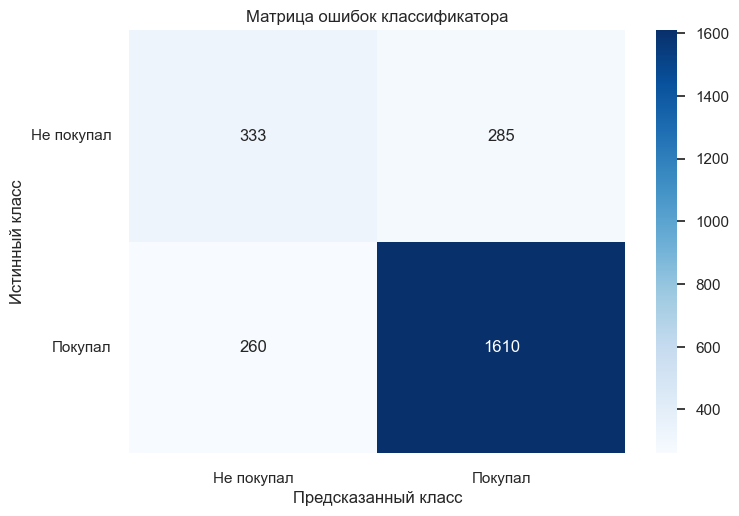

In [235]:
# Подготовка данных для классификации
df_class = preprocess_for_classifier(model_df)
df_class['purchase_true'] = (df_class['shoes_mean'] > 0).astype(int)

print(f"Размер датасета для классификации: {df_class.shape}")
print(f"Распределение классов: {df_class['purchase_true'].value_counts().to_dict()}")

# Разделение на признаки и целевую переменную
X_c = df_class.drop(['shoes_mean','purchase_true'], axis=1)
y_c = df_class['purchase_true']

# Разделение на обучающую и тестовую выборки
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

print(f"Тренировочная выборка: {X_train_c.shape}")
print(f"Тестовая выборка: {X_test_c.shape}")
    
# Настройка препроцессинга для классификации
numerical_cols = X_c.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_c.select_dtypes(exclude=['number']).columns.tolist()

print(f"Числовые признаки ({len(numerical_cols)}): {numerical_cols}")
print(f"Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
    
preprocessor_c = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)])
# параметры LGBMClassifier

# расчёт весов классов
# classes = np.unique(y_train_c)
# weights = compute_class_weight('balanced', classes=classes, y=y_train_c)
# class_weights = dict(zip(classes, weights))


# Параметры LightGBM для классификации
lgb_params = {
    'random_state': 42,
    'objective': 'cross_entropy',
    'metric': 'binary_logloss',
    'boosting_type': 'dart',  
    'num_leaves': 64,
    'max_depth': 8,
    'min_child_samples': 30,
    'min_data_in_leaf': 50,
    'learning_rate': 0.05,
    'n_estimators': 1000,  
    'reg_alpha': 0.3,
    'reg_lambda': 0.3,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 3,
    'class_weight': {0: 100, 1: 78},
#     'scale_weight': 0.8,
    'n_jobs': -1
}

# Создание пайплайна с обработкой дисбаланса
classifier_pipeline = ImbPipeline([
    ('preprocessor_c', preprocessor_c),
    ('adasyn', ADASYN(sampling_strategy=0.96, random_state=42)), 
    ('classifier', LGBMClassifier(**lgb_params))
    ])
    
# Кросс-валидация и оценка модели классификатора
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
# Метрики для оценки
scoring = {
    'precision_class0': make_scorer(precision_score, pos_label=0),
    'precision': 'precision',
    'recall_class0': make_scorer(recall_score, pos_label=0),
    'recall': 'recall',
    'f1_class0': make_scorer(f1_score, pos_label=0),
    'f1': 'f1',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
    }

# Кросс-валидация
cv_results = cross_validate(
    classifier_pipeline,
    X_train_c,
    y_train_c,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,
    error_score='raise'
)
# Выводим средние результаты по фолдам
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ (КЛАССИФИКАТОР)")
print("="*50)

print(f"Средняя precision для класса 0: {np.mean(cv_results['test_precision_class0']):.4f}")
print(f"Средняя precision для класса 1: {np.mean(cv_results['test_precision']):.4f}\n")
print(f"Средний recall для класса 0: {np.mean(cv_results['test_recall_class0']):.4f}")
print(f"Средний recall для класса 1: {np.mean(cv_results['test_recall']):.4f}\n")
print(f"Средний F1-score для класса 0: {np.mean(cv_results['test_f1_class0']):.4f}")
print(f"Средний F1-score для класса 1: {np.mean(cv_results['test_f1']):.4f}\n")
print(f"Средний F1-score (macro): {np.mean(cv_results['test_f1_macro']):.4f}")
print(f"Средняя точность (accuracy): {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Средний ROC-AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
    
# Обучение финальной модели на всем тренировочном наборе
classifier_pipeline.fit(X_train_c, y_train_c)
    
# Предсказания на тестовом наборе
y_pred_c = classifier_pipeline.predict(X_test_c)
y_proba = classifier_pipeline.predict_proba(X_test_c)[:, 1]
    
# Оценка качества на тестовом наборе
print("\n" + "="*50)
print("ОЦЕНКА НА ТЕСТОВОМ НАБОРЕ")
print("="*50)

print("Отчет классификации:")
print(classification_report(y_test_c, y_pred_c))
print(f"ROC-AUC score: {roc_auc_score(y_test_c, y_proba):.4f}")
print(f"F1 score: {f1_score(y_test_c, y_pred_c, average='macro')}")
print(f"Precision: {precision_score(y_test_c, y_pred_c)}")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_c)}")

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не покупал', 'Покупал'],
            yticklabels=['Не покупал', 'Покупал'])
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Матрица ошибок классификатора')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.savefig('Матрица ошибок.png', dpi=800, bbox_inches='tight')  
plt.show()

### 2 Регрессор Доля покупок обуви

In [236]:
import lightgbm as lgb
# Подготовка данных для регрессии (только клиенты, покупавшие обувь)
df_reg = preprocess_for_regressor(model_df)
df_reg_train = df_reg[df_reg['shoes_mean'] > 0]

print(f"Размер датасета для регрессии: {df_reg_train.shape}")
print(f"Статистики целевой переменной:")
print(df_reg_train['shoes_mean'].describe())

X_r = df_reg_train.drop(['shoes_mean'], axis=1)
y_r = df_reg_train['shoes_mean']

# Настройка препроцессинга для регрессии
numeric_cols = X_r.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_r.select_dtypes(exclude=['number']).columns.tolist()
    
preprocessor_r = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
        ]), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Параметры LightGBM для регрессии
lgb_params_reg = {
    
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mae', 'mse'],
    'num_leaves': 55,
    'min_child_samples': 10,
    'learning_rate': 0.11,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'max_depth': 3,
    'min_data_in_leaf': 19,
    'verbose': -1,
    'random_state': 42
    }
    
# Создание pipeline с препроцессингом и моделью
regressor_pipeline = Pipeline([
    ('preprocessor_r', preprocessor_r),
    ('regressor', lgb.LGBMRegressor(**lgb_params_reg))
    ])

# Стратификация по бинам целевой переменной
n_bins = 10    
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_binned = kbins.fit_transform(y_r.values.reshape(-1, 1)).astype(int).reshape(-1)

# Стратифицированная кросс-валидация с псевдоклассами (бинами).
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for train_idx, test_idx in cv.split(X_r, y_binned):
    X_train_fold, X_test_fold = X_r.iloc[train_idx], X_r.iloc[test_idx]
    y_train_fold, y_test_fold = y_r.iloc[train_idx], y_r.iloc[test_idx]
        
    # Обучение на текущем фолде
    regressor_pipeline.fit(X_train_fold, y_train_fold)
    
    # Предсказание на тестовом фолде
    y_pred_fold = regressor_pipeline.predict(X_test_fold)
    y_pred_fold = np.clip(y_pred_fold, 0, 1) # Ограничение предсказаний
    
    # Вычисление метрик
    mae = mean_absolute_error(y_test_fold, y_pred_fold)
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred_fold)
    
    # Сохраняем метрики для анализа
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Итоговые результаты
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ (РЕГРЕССОР)")
print("="*50)

print(f"MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

# Обучение финальной модели регрессора и оценка на тестовом наборе

# Разделение данных на train и test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

    
# Обучение модели на всем тренировочном наборе
regressor_pipeline.fit(X_train_r, y_train_r)
    
# Предсказание на тестовом наборе
y_pred_reg = regressor_pipeline.predict(X_test_r)
y_pred_reg = np.clip(y_pred_reg, 0, 1)

    
# Оценка качества на тестовом наборе
test_mae = mean_absolute_error(y_test_r, y_pred_reg)
test_mse = mean_squared_error(y_test_r, y_pred_reg)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_r, y_pred_reg)
    
print("\n" + "="*50)
print("ОЦЕНКА НА ТЕСТОВОМ НАБОРЕ (РЕГРЕССОР)")
print("="*50)

print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R2: {test_r2:.4f}")

Размер датасета для регрессии: (9349, 16)
Статистики целевой переменной:
count    9349.000000
mean        0.496280
std         0.281643
min         0.022222
25%         0.250000
50%         0.500000
75%         0.666667
max         1.000000
Name: shoes_mean, dtype: float64


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.w


РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ (РЕГРЕССОР)
MAE: 0.1672 ± 0.0015
MSE: 0.0433 ± 0.0007
RMSE: 0.2080 ± 0.0016
R2: 0.4544 ± 0.0121

ОЦЕНКА НА ТЕСТОВОМ НАБОРЕ (РЕГРЕССОР)
MAE: 0.1685
MSE: 0.0445
RMSE: 0.2109
R2: 0.4435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Прогнозирование на новых данных 

In [237]:
def predict_propensity(new_transactions_df, classifier_pipeline, regressor_pipeline):
    """
    Функция для предсказания склонности к покупке обуви
    
    Parameters:
    -----------
    new_transactions_df : pandas.DataFrame
        Новые транзакции для прогнозирования
    classifier_pipeline : sklearn.Pipeline
        Обученный пайплайн классификатора
    regressor_pipeline : sklearn.Pipeline
        Обученный пайплайн регрессора
        
    Returns:
    --------
    pandas.DataFrame
        Датафрейм с предсказаниями для каждого клиента
    """
    # Препроцессинг под обе модели 
    X_new_c = preprocess_for_classifier(new_transactions_df)
    X_new_r = preprocess_for_regressor(new_transactions_df)
    
    # Общие клиенты
    shared_ids = X_new_c.index.intersection(X_new_r.index)
    X_new_c = X_new_c.loc[shared_ids]
    X_new_r = X_new_r.loc[shared_ids]

    # Предсказания 
    probs = classifier_pipeline.predict_proba(X_new_c)[:,1]  # Вероятность покупки обуви
    shares = regressor_pipeline.predict(X_new_r)             # Ожидаемая доля покупок обуви
    shares = np.clip(shares, 0, 1)

    # Склонность к покупке
    propensity = probs * shares
    return pd.DataFrame({
        "id": shared_ids,
        "probability": probs,
        "expected_share": shares,
        "propensity_score": propensity
    }).sort_values('propensity_score', ascending=False)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,id,probability,expected_share,propensity_score
3385,48150,0.947199,1.000000,0.947199
8429,120736,0.943618,1.000000,0.943618
4922,70711,0.933821,0.984199,0.919066
10908,155312,0.911239,1.000000,0.911239
4030,57530,0.906639,1.000000,0.906639
...,...,...,...,...
10285,146348,0.015204,0.450796,0.006854
10404,148049,0.168184,0.038720,0.006512
1209,17242,0.014169,0.446695,0.006329
2496,35495,0.013635,0.435011,0.005931


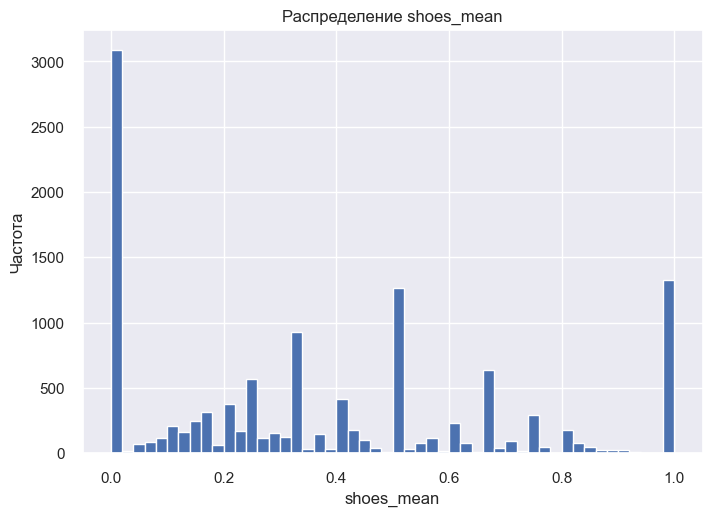

In [238]:
# Пример использования
predict_propensity(model_df, classifier_pipeline, regressor_pipeline)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


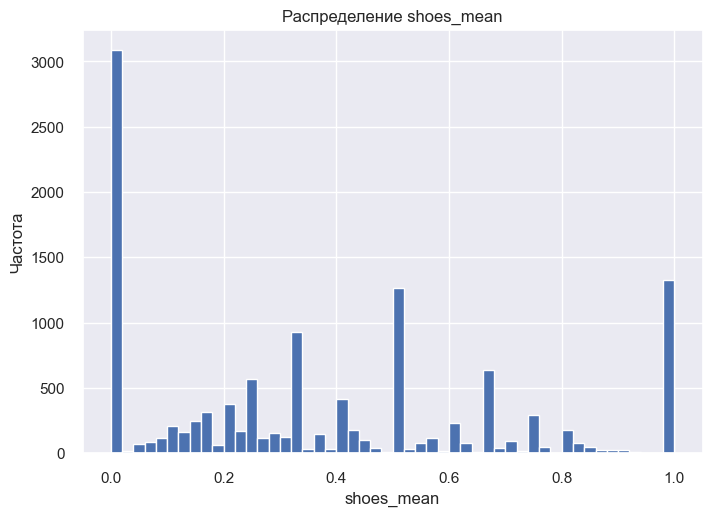

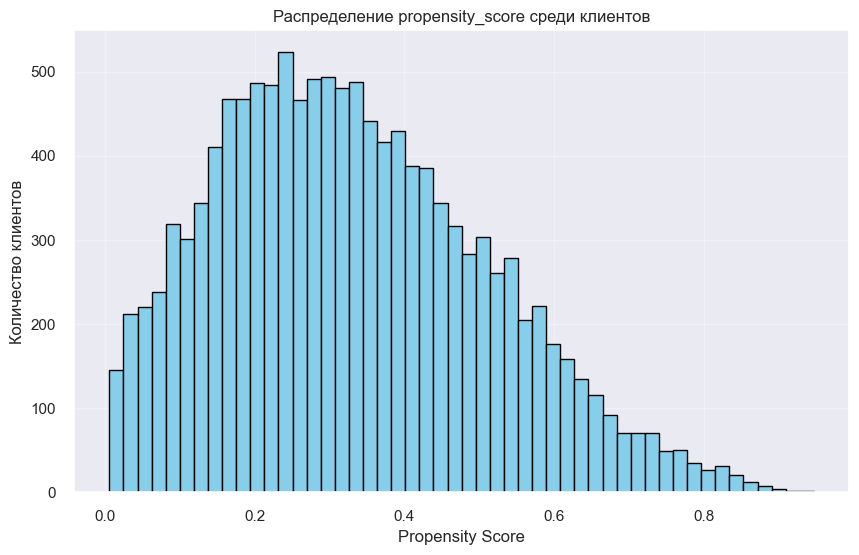

In [239]:
# Гистограмма распределения propensity_score
propensity_df = predict_propensity(model_df, classifier_pipeline, regressor_pipeline)

plt.figure(figsize=(10, 6))
plt.hist(propensity_df['propensity_score'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение propensity_score среди клиентов')
plt.xlabel('Propensity Score')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3)
plt.savefig('propensity_distribution.png', dpi=800, bbox_inches='tight')
plt.show()



### Практическое применение

- **Таргетированный маркетинг**: Фокус на клиентах с высоким propensity score
- **Персонализация предложений**: Тестировать персонализированные предложения (скидки, комплекты) для клиентов с высоким propensity_score.